## 1-2. Check inconsistency of PCD data  
#### comparing inconsistencies of two datasets in terms of the number of stations, the number of pollutants, observation duration, and data itself
#### i) loading two datasets

In [147]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import csv
from datetime import datetime as dt
import matplotlib.pyplot as plt

In [74]:
file='./ML/ADPC_refined.csv'
file2='./ML/fern_refined.csv'

In [75]:
## open the ADPC_refined.csv file and load as a dataframe
with open(file) as f:
    reader = csv.reader(f)
    headers = next(reader)
    
#if column is empty, ignore it to prevent 'unnamed' columns
header_indices = [i for i, item in enumerate(headers) if item] 
adpc_df=pd.read_csv(file, usecols=header_indices)

In [181]:
## open the fern_refined.csv file and load as a dataframe 
with open(file2) as f2: 
    reader=csv.reader(f2)
    headers=next(reader)
    
header_indices = [i for i, item in enumerate(headers) if item] 
fern_df=pd.read_csv(file2, usecols=header_indices)

#### ii) comparing basic info of two datasets

In [77]:
adpc_df.head()

datetime stationid  PM25  PM10  O3  CO  NO  NOX  NO2  SO2  ...  \
0  2010-01-01 00:00:00       02t   NaN   NaN NaN NaN NaN  NaN  NaN  NaN  ...   
1  2010-01-01 01:00:00       02t   NaN   NaN NaN NaN NaN  NaN  NaN  NaN  ...   
2  2010-01-01 02:00:00       02t   NaN   NaN NaN NaN NaN  NaN  NaN  NaN  ...   
3  2010-01-01 03:00:00       02t   NaN   NaN NaN NaN NaN  NaN  NaN  NaN  ...   
4  2010-01-01 04:00:00       02t   NaN   NaN NaN NaN NaN  NaN  NaN  NaN  ...   

   Rain  Pressure  Temp  Temp_3m  Temp_10m  Temp_30m  Rel hum  Rel hum_3m  \
0   0.0      29.8  28.4      NaN       NaN       NaN      NaN        80.3   
1   0.0      29.8  28.1      NaN       NaN       NaN      NaN        82.2   
2   0.0      29.8  27.9      NaN       NaN       NaN      NaN        82.8   
3   0.0      29.8  27.8      NaN       NaN       NaN      NaN        83.1   
4   0.0      29.8  27.7      NaN       NaN       NaN      NaN        83.8   

   Rel hum_10m  Rel hum_30m  
0          NaN          NaN  
1          NaN          NaN  
2          NaN          NaN  
3          NaN          NaN  
4          NaN          NaN  

[5 rows x 24 columns]

In [28]:
#adpc_df.rename(columns={i:j for i,j in zip(adpc_df.columns,col)},inplace=True)

In [ ]:
#format as datatime type
adpc_df['datetime']=pd.to_datetime(adpc_df['datetime'], format="%Y-%m-%d %H:%M:%S")

In [182]:
#format as datetime type
fern_df['datetime']=pd.to_datetime(fern_df['datetime'], format="%Y-%m-%d %H:%M:%S")

In [68]:
adpc_df.columns

Index(['datetime', 'stationid', 'PM25', 'PM10', 'O3', 'CO', 'NO', 'NOX', 'NO2',
       'SO2', 'Wind speed', 'Wind dir', 'Glob rad', 'Net rad', 'Rain',
       'Pressure', 'Temp', 'Temp_3m', 'Temp_10m', 'Temp_30m', 'Rel hum',
       'Rel hum_3m', 'Rel hum_10m', 'Rel hum_30m'],
      dtype='object')

In [78]:
fern_df.head()

datetime stationid  PM25  PM10  O3   CO   NO2  SO2
0  1996-01-01 00:00:00       02t   NaN   NaN NaN  2.6  32.0  5.0
1  1996-01-01 01:00:00       02t   NaN   NaN NaN  2.8  30.0  6.0
2  1996-01-01 02:00:00       02t   NaN   NaN NaN  2.8  29.0  6.0
3  1996-01-01 03:00:00       02t   NaN   NaN NaN  2.5  25.0  5.0
4  1996-01-01 04:00:00       02t   NaN   NaN NaN  1.4  21.0  5.0

In [12]:
print(adpc_df['stationid'].unique())
print(len(adpc_df['stationid'].unique()))

['02t' '03t' '05t' '08t' '10t' '11t' '12t' '13t' '14t' '16t' '17t' '18t'
 '19t' '20t' '21t' '22t' '24t' '25t' '26t' '27t' '28t' '29t' '30t' '31t'
 '32t' '33t' '34t' '35t' '36t' '37t' '38t' '39t' '40t' '41t' '42t' '43t'
 '44t' '46t' '47t' '50t' '52t' '53t' '54t' '57t' '58t' '59t' '60t' '61t'
 '62t' '63t' '67t' '68t' '69t' '70t' '71t' '72t' '73t' '74t' '75t' '76t'
 '77t' '78t' '79t' '80t' '81t' '82t' '83t' '84t']
68


In [34]:
print(adpc_df.columns)
print(len(adpc_df.columns))

Index(['datetime', 'stationid', 'PM2.5', 'PM10', 'O3', 'CO', 'NO', 'NOX',
       'NO2', 'SO2', 'Wind speed', 'Wind dir', 'Glob rad', 'Net rad', 'Rain',
       'Pressure', 'Temp', 'Temp_3m', 'Temp_10m', 'Temp_30m', 'Rel hum',
       'Rel hum_3m', 'Rel hum_10m', 'Rel hum_30m'],
      dtype='object')
24


In [273]:
adpc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5459808 entries, 2010-01-01 00:00:00 to 2020-12-31 23:00:00
Data columns (total 23 columns):
 #   Column       Dtype  
---  ------       -----  
 0   stationid    object 
 1   PM25         float64
 2   PM10         float64
 3   O3           float64
 4   CO           float64
 5   NO           float64
 6   NOX          float64
 7   NO2          float64
 8   SO2          float64
 9   Wind speed   float64
 10  Wind dir     float64
 11  Glob rad     float64
 12  Net rad      float64
 13  Rain         float64
 14  Pressure     float64
 15  Temp         float64
 16  Temp_3m      float64
 17  Temp_10m     float64
 18  Temp_30m     float64
 19  Rel hum      float64
 20  Rel hum_3m   float64
 21  Rel hum_10m  float64
 22  Rel hum_30m  float64
dtypes: float64(22), object(1)
memory usage: 1.0+ GB


In [118]:
adpc_df.loc['2019-12-31 00:00:00',:]

stationid  PM25   PM10    O3  CO  NO  NOX  NO2  SO2  Wind speed  \
datetime                                                                     
2019-12-31       02t  55.0    NaN   4.0 NaN NaN  NaN  NaN  NaN         0.1   
2019-12-31       03t  45.0   68.0   0.0 NaN NaN  NaN  NaN  NaN         0.1   
2019-12-31       05t  59.0   89.0   2.0 NaN NaN  NaN  NaN  NaN         0.1   
2019-12-31       08t  70.0   90.0   3.0 NaN NaN  NaN  NaN  NaN         0.1   
2019-12-31       10t  64.0   93.0   6.0 NaN NaN  NaN  NaN  NaN         0.3   
...              ...   ...    ...   ...  ..  ..  ...  ...  ...         ...   
2019-12-31       80t   1.0    7.0  27.0 NaN NaN  NaN  NaN  NaN         2.2   
2019-12-31       81t  70.0  119.0  30.0 NaN NaN  NaN  NaN  NaN         0.9   
2019-12-31       82t   NaN    NaN   NaN NaN NaN  NaN  NaN  NaN         NaN   
2019-12-31       83t   NaN    NaN   NaN NaN NaN  NaN  NaN  NaN         NaN   
2019-12-31       84t   NaN    NaN   NaN NaN NaN  NaN  NaN  NaN         NaN   

            ...  Rain  Pressure  Temp  Temp_3m  Temp_10m  Temp_30m  Rel hum  \
datetime    ...                                                               
2019-12-31  ...   0.0       NaN  28.5      NaN       NaN       NaN     56.0   
2019-12-31  ...   NaN       NaN  25.7      NaN       NaN       NaN      NaN   
2019-12-31  ...   0.0       NaN  25.6      NaN       NaN       NaN     67.0   
2019-12-31  ...   0.0       NaN  25.4      NaN       NaN       NaN     73.0   
2019-12-31  ...   0.0       NaN  26.8      NaN       NaN       NaN      NaN   
...         ...   ...       ...   ...      ...       ...       ...      ...   
2019-12-31  ...   0.0       NaN  25.8      NaN       NaN       NaN     77.0   
2019-12-31  ...   0.0       NaN  24.8      NaN       NaN       NaN     76.0   
2019-12-31  ...   NaN       NaN   NaN      NaN       NaN       NaN      NaN   
2019-12-31  ...   NaN       NaN   NaN      NaN       NaN       NaN      NaN   
2019-12-31  ...   NaN       NaN   NaN      NaN       NaN       NaN      NaN   

            Rel hum_3m  Rel hum_10m  Rel hum_30m  
datetime                                          
2019-12-31         NaN          NaN          NaN  
2019-12-31         NaN          NaN          NaN  
2019-12-31         NaN          NaN          NaN  
2019-12-31         NaN          NaN          NaN  
2019-12-31         NaN          NaN          NaN  
...                ...          ...          ...  
2019-12-31         NaN          NaN          NaN  
2019-12-31         NaN          NaN          NaN  
2019-12-31         NaN          NaN          NaN  
2019-12-31         NaN          NaN          NaN  
2019-12-31         NaN          NaN          NaN  

[68 rows x 23 columns]

In [282]:
info=adpc_df[adpc_df['stationid']=='02t'].describe()['PM25']

In [283]:
info

count    11927.000000
mean        23.905089
std         15.581152
min          2.000000
25%         13.000000
50%         20.000000
75%         31.000000
max        167.000000
Name: PM25, dtype: float64

In [284]:
info['count']

11927.0

In [263]:
adpc_df.describe()

PM25          PM10            O3            CO            NO  \
count  1.985789e+06  4.709494e+06  3.883381e+06  14621.000000  11241.000000   
mean   2.569020e+01  4.395381e+01  2.196427e+01      0.549538     11.274824   
std    2.317738e+01  3.506128e+01  1.898839e+01      0.369566     13.189354   
min    0.000000e+00  0.000000e+00  0.000000e+00      0.000000      0.000000   
25%    1.100000e+01  2.200000e+01  8.000000e+00      0.300000      3.000000   
50%    1.900000e+01  3.500000e+01  1.700000e+01      0.500000      8.000000   
75%    3.300000e+01  5.600000e+01  3.100000e+01      0.700000     15.000000   
max    5.970000e+02  9.690000e+02  2.390000e+02      6.100000    157.000000   

                NOX           NO2           SO2    Wind speed      Wind dir  \
count  11241.000000  11242.000000  14499.000000  4.747307e+06  4.734031e+06   
mean      31.485722     20.215442      0.841437  1.170156e+00  1.795856e+02   
std       23.484139     13.016028      0.860070  3.142544e+00  9.544748e+01   
min        0.000000      0.000000      0.000000  0.000000e+00 -9.990000e+02   
25%       15.000000     11.000000      0.000000  4.000000e-01  1.010000e+02   
50%       27.000000     18.000000      1.000000  9.000000e-01  1.890000e+02   
75%       42.000000     27.000000      1.000000  1.600000e+00  2.490000e+02   
max      242.000000    113.000000     13.000000  3.590000e+02  1.174000e+03   

       ...          Rain      Pressure          Temp        Temp_3m  \
count  ...  4.381703e+06  2.616786e+06  4.238120e+06  529712.000000   
mean   ...  2.526169e-01  7.410541e+02  2.830455e+01      26.459503   
std    ...  5.883192e+00  1.858999e+02  4.015124e+00       5.160081   
min    ...  0.000000e+00 -1.243760e+05  0.000000e+00       0.100000   
25%    ...  0.000000e+00  7.450000e+02  2.590000e+01      23.500000   
50%    ...  0.000000e+00  7.550000e+02  2.830000e+01      26.400000   
75%    ...  0.000000e+00  7.590000e+02  3.100000e+01      30.000000   
max    ...  1.671400e+03  1.031000e+03  3.530000e+02      91.000000   

          Temp_10m     Temp_30m       Rel hum     Rel hum_3m  Rel hum_10m  \
count  9600.000000  9527.000000  3.547850e+06  523659.000000  8750.000000   
mean     30.829042    33.106571  7.115640e+01      74.851944    70.820663   
std       7.088787     6.579609  1.745718e+01      19.035659    21.707045   
min       0.200000    14.000000  0.000000e+00       9.000000     0.000000   
25%      26.400000    28.800000  5.900000e+01      61.000000    54.000000   
50%      29.500000    32.500000  7.300000e+01      78.000000    76.000000   
75%      36.200000    37.900000  8.400000e+01      91.000000    89.000000   
max      51.700000    50.800000  8.570000e+02     103.000000   102.400000   

       Rel hum_30m  
count  8572.000000  
mean     69.172154  
std      20.455200  
min       0.200000  
25%      54.900000  
50%      70.000000  
75%      87.700000  
max     102.400000  

[8 rows x 22 columns]

In [111]:
fern_df[fern_df['stationid']=='02t'].describe()

PM25          PM10            O3             CO            NO2  \
count  27762.000000  81651.000000  63543.000000  166247.000000  160034.000000   
mean      46.066098     52.906602     17.921760       0.611751      21.344137   
std       35.176243     31.846810     17.386139       0.692284      14.099645   
min        2.000000      1.000000      0.000000       0.000000       0.000000   
25%       21.000000     31.000000      5.000000       0.150000      12.000000   
50%       37.000000     46.000000     12.600000       0.400000      17.500000   
75%       60.000000     67.000000     25.000000       0.800000      27.000000   
max      414.000000    489.000000    159.000000      13.200000     188.100000   

                 SO2  
count  167422.000000  
mean        2.084085  
std         3.156195  
min         0.000000  
25%         1.000000  
50%         1.000000  
75%         3.000000  
max       203.600000

In [264]:
fern_df.describe()

PM25          PM10            O3            CO           NO2  \
count  1.992036e+06  6.373918e+06  5.796313e+06  5.594487e+06  6.077086e+06   
mean   2.660544e+01  5.150121e+01  1.985608e+01  6.939175e-01  1.589821e+01   
std    2.378052e+01  4.496170e+01  1.876054e+01  1.404030e+01  1.463163e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00 -1.434330e-06  0.000000e+00   
25%    1.100000e+01  2.400000e+01  6.000000e+00  3.000000e-01  6.000000e+00   
50%    2.000000e+01  3.950000e+01  1.400000e+01  5.400000e-01  1.200000e+01   
75%    3.400000e+01  6.500000e+01  2.800000e+01  9.000000e-01  2.100000e+01   
max    7.320000e+02  2.775000e+03  4.790000e+02  3.200854e+04  5.266990e+02   

                SO2  
count  5.545607e+06  
mean   3.445573e+00  
std    5.564568e+00  
min   -7.000000e+00  
25%    1.000000e+00  
50%    2.000000e+00  
75%    4.000000e+00  
max    4.780000e+02

In [112]:
adpc_df.isnull().sum()

datetime             0
stationid            0
PM25           3474019
PM10            750314
O3             1576427
CO             5445187
NO             5448567
NOX            5448567
NO2            5448566
SO2            5445309
Wind speed      712501
Wind dir        725777
Glob rad       3050932
Net rad        3439769
Rain           1078105
Pressure       2843022
Temp           1221688
Temp_3m        4930096
Temp_10m       5450208
Temp_30m       5450281
Rel hum        1911958
Rel hum_3m     4936149
Rel hum_10m    5451058
Rel hum_30m    5451236
dtype: int64

In [40]:
fern_df.head()

datetime stationid  PM2.5  PM10  O3   CO   NO2  SO2
0  1996-01-01 00:00:00       02t    NaN   NaN NaN  2.6  32.0  5.0
1  1996-01-01 01:00:00       02t    NaN   NaN NaN  2.8  30.0  6.0
2  1996-01-01 02:00:00       02t    NaN   NaN NaN  2.8  29.0  6.0
3  1996-01-01 03:00:00       02t    NaN   NaN NaN  2.5  25.0  5.0
4  1996-01-01 04:00:00       02t    NaN   NaN NaN  1.4  21.0  5.0

In [41]:
fern_df.tail()

datetime stationid  PM2.5   PM10    O3    CO   NO2  SO2
7015196  2021-03-11 21:00:00       58t  181.0  203.0  12.0  1.13  14.0  NaN
7015197  2021-03-11 22:00:00       58t  174.0  193.0  14.0  1.05   9.0  NaN
7015198  2021-03-11 23:00:00       58t  177.0  193.0  12.0  1.07   8.0  NaN
7015199  2021-03-12 00:00:00       58t  184.0  198.0  11.0  1.08   7.0  NaN
7015200  2021-03-12 01:00:00       58t  194.0  206.0  10.0  1.08   7.0  NaN

In [42]:
print(fern_df['stationid'].unique())
print(len(fern_df['stationid'].unique()))

['02t' '03t' '05t' '10t' '11t' '12t' '50t' '52t' '53t' '54t' '59t' '61t'
 '79t' 'o24' 'o21' '46t' '60t' '32t' '33t' '34t' 'o23' '87t' '76t' '81t'
 '88t' '47t' '89t' '41t' '13t' '22t' '62t' '67t' '75t' 'm7' 'o22' '20t'
 '77t' '21t' '70t' 'o26' '86t' '43t' 'o10' '63t' '78t' '28t' '29t' '30t'
 '31t' '74t' 'm9' '26t' 'o20' 'o63' '37t' '38t' '39t' '40t' '68t' 'm1'
 '44t' '80t' '08t' '16t' '17t' '18t' '19t' 'o27' '84t' '14t' '27t' '24t'
 '25t' '71t' '85t' '42t' 'o28' '82t' 'o29' 'o25' '83t' '57t' '73t' '35t'
 '36t' 'o30' 'o31' 'o59' '72t' '69t' '58t']
91


In [43]:
print(fern_df.columns)
print(len(fern_df.columns))

Index(['datetime', 'stationid', 'PM2.5', 'PM10', 'O3', 'CO', 'NO2', 'SO2'], dtype='object')
8


In [265]:
fern_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7015201 entries, 1996-01-01 00:00:00 to 2021-03-12 01:00:00
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   stationid  object 
 1   PM25       float64
 2   PM10       float64
 3   O3         float64
 4   CO         float64
 5   NO2        float64
 6   SO2        float64
dtypes: float64(6), object(1)
memory usage: 428.2+ MB


#### iii) comparing observation duration

#### ADPC's data

In [364]:
col=list(adpc_data['stationid'].unique())
col.append('total')

In [239]:
st_data_a = pd.DataFrame(index=adpc_data.columns[5:],columns=col)

In [348]:
st_data_a.index

Index([' PM2.5', ' PM10', 'O3', 'CO', ' NO ', ' NOX ', ' NO2', ' SO2 ',
       ' Wind speed', ' Wind dir', ' Glob rad', ' Net rad', ' Rain',
       ' Pressure', ' Temp', ' Temp_3m', ' Temp_10m', ' Temp_30m', ' Rel hum',
       ' Rel hum_3m', ' Rel hum_10m', ' Rel hum_30m'],
      dtype='object')

In [349]:
st_data_a.columns

Index(['02t', '03t', '05t', '08t', '10t', '11t', '12t', '13t', '14t', '16t',
       '17t', '18t', '19t', '20t', '21t', '22t', '24t', '25t', '26t', '27t',
       '28t', '29t', '30t', '31t', '32t', '33t', '34t', '35t', '36t', '37t',
       '38t', '39t', '40t', '41t', '42t', '43t', '44t', '46t', '47t', '50t',
       '52t', '53t', '54t', '57t', '58t', '59t', '60t', '61t', '62t', '63t',
       '67t', '68t', '69t', '70t', '71t', '72t', '73t', '74t', '75t', '76t',
       '77t', '78t', '79t', '80t', '81t', '82t', '83t', '84t', 'total'],
      dtype='object')

In [340]:
for st_id in st_data_a.columns[:-1]:
    for col in st_data_a.index: 
        print(st_id,col)
        st=adpc_df[adpc_df['stationid']==st_id]
        l=st[col].dropna(axis=0)
        if len(l.index) != 0: 
            s_date=st['datetime'][l.index[0]]
            e_date=st['datetime'][l.index[-1]]
        else: 
            s_date=np.nan
            e_date=np.nan
        st_data_a.loc[col,st_id]=[len(l),"("+str('{:.2f}'.format(len(l)/len(st)*100))+"%)",s_date,e_date,e_date-s_date]

02t  PM2.5
02t  PM10
02t O3
02t CO
02t  NO 
02t  NOX 
02t  NO2
02t  SO2 
02t  Wind speed
02t  Wind dir
02t  Glob rad
02t  Net rad
02t  Rain
02t  Pressure
02t  Temp
02t  Temp_3m
02t  Temp_10m
02t  Temp_30m
02t  Rel hum
02t  Rel hum_3m
02t  Rel hum_10m
02t  Rel hum_30m
03t  PM2.5
03t  PM10
03t O3
03t CO
03t  NO 
03t  NOX 
03t  NO2
03t  SO2 
03t  Wind speed
03t  Wind dir
03t  Glob rad
03t  Net rad
03t  Rain
03t  Pressure
03t  Temp
03t  Temp_3m
03t  Temp_10m
03t  Temp_30m
03t  Rel hum
03t  Rel hum_3m
03t  Rel hum_10m
03t  Rel hum_30m
05t  PM2.5
05t  PM10
05t O3
05t CO
05t  NO 
05t  NOX 
05t  NO2
05t  SO2 
05t  Wind speed
05t  Wind dir
05t  Glob rad
05t  Net rad
05t  Rain
05t  Pressure
05t  Temp
05t  Temp_3m
05t  Temp_10m
05t  Temp_30m
05t  Rel hum
05t  Rel hum_3m
05t  Rel hum_10m
05t  Rel hum_30m
08t  PM2.5
08t  PM10
08t O3
08t CO
08t  NO 
08t  NOX 
08t  NO2
08t  SO2 
08t  Wind speed
08t  Wind dir
08t  Glob rad
08t  Net rad
08t  Rain
08t  Pressure
08t  Temp
08t  Temp_3m
08t  Temp_10m
08t  

38t  Temp_3m
38t  Temp_10m
38t  Temp_30m
38t  Rel hum
38t  Rel hum_3m
38t  Rel hum_10m
38t  Rel hum_30m
39t  PM2.5
39t  PM10
39t O3
39t CO
39t  NO 
39t  NOX 
39t  NO2
39t  SO2 
39t  Wind speed
39t  Wind dir
39t  Glob rad
39t  Net rad
39t  Rain
39t  Pressure
39t  Temp
39t  Temp_3m
39t  Temp_10m
39t  Temp_30m
39t  Rel hum
39t  Rel hum_3m
39t  Rel hum_10m
39t  Rel hum_30m
40t  PM2.5
40t  PM10
40t O3
40t CO
40t  NO 
40t  NOX 
40t  NO2
40t  SO2 
40t  Wind speed
40t  Wind dir
40t  Glob rad
40t  Net rad
40t  Rain
40t  Pressure
40t  Temp
40t  Temp_3m
40t  Temp_10m
40t  Temp_30m
40t  Rel hum
40t  Rel hum_3m
40t  Rel hum_10m
40t  Rel hum_30m
41t  PM2.5
41t  PM10
41t O3
41t CO
41t  NO 
41t  NOX 
41t  NO2
41t  SO2 
41t  Wind speed
41t  Wind dir
41t  Glob rad
41t  Net rad
41t  Rain
41t  Pressure
41t  Temp
41t  Temp_3m
41t  Temp_10m
41t  Temp_30m
41t  Rel hum
41t  Rel hum_3m
41t  Rel hum_10m
41t  Rel hum_30m
42t  PM2.5
42t  PM10
42t O3
42t CO
42t  NO 
42t  NOX 
42t  NO2
42t  SO2 
42t  Wind speed
42t

78t  NO2
78t  SO2 
78t  Wind speed
78t  Wind dir
78t  Glob rad
78t  Net rad
78t  Rain
78t  Pressure
78t  Temp
78t  Temp_3m
78t  Temp_10m
78t  Temp_30m
78t  Rel hum
78t  Rel hum_3m
78t  Rel hum_10m
78t  Rel hum_30m
79t  PM2.5
79t  PM10
79t O3
79t CO
79t  NO 
79t  NOX 
79t  NO2
79t  SO2 
79t  Wind speed
79t  Wind dir
79t  Glob rad
79t  Net rad
79t  Rain
79t  Pressure
79t  Temp
79t  Temp_3m
79t  Temp_10m
79t  Temp_30m
79t  Rel hum
79t  Rel hum_3m
79t  Rel hum_10m
79t  Rel hum_30m
80t  PM2.5
80t  PM10
80t O3
80t CO
80t  NO 
80t  NOX 
80t  NO2
80t  SO2 
80t  Wind speed
80t  Wind dir
80t  Glob rad
80t  Net rad
80t  Rain
80t  Pressure
80t  Temp
80t  Temp_3m
80t  Temp_10m
80t  Temp_30m
80t  Rel hum
80t  Rel hum_3m
80t  Rel hum_10m
80t  Rel hum_30m
81t  PM2.5
81t  PM10
81t O3
81t CO
81t  NO 
81t  NOX 
81t  NO2
81t  SO2 
81t  Wind speed
81t  Wind dir
81t  Glob rad
81t  Net rad
81t  Rain
81t  Pressure
81t  Temp
81t  Temp_3m
81t  Temp_10m
81t  Temp_30m
81t  Rel hum
81t  Rel hum_3m
81t  Rel hum_10m

In [377]:
st_data_a.loc[' PM2.5','total']=[]

In [378]:
for col in st_data_a.index: 
    st=adpc_df
    l=st[col].dropna(axis=0)
    #st_data_a.loc[col,'total']=1
    st_data_a.at[col,'total']=[(len(l)),"("+str('{:.2f}'.format(len(l)/len(st)*100))+"%)"]

In [379]:
st_data_a

02t  \
 PM2.5        [11927, (12.10%), 2019-08-18 02:00:00, 2020-12...   
 PM10         [74412, (75.47%), 2010-01-07 09:00:00, 2020-12...   
O3            [53295, (54.06%), 2010-01-28 12:00:00, 2020-12...   
CO                                  [0, (0.00%), nan, nan, nan]   
 NO                                 [0, (0.00%), nan, nan, nan]   
 NOX                                [0, (0.00%), nan, nan, nan]   
 NO2                                [0, (0.00%), nan, nan, nan]   
 SO2                                [0, (0.00%), nan, nan, nan]   
 Wind speed   [80936, (82.09%), 2010-01-01 00:00:00, 2020-12...   
 Wind dir     [80817, (81.97%), 2010-01-01 00:00:00, 2020-12...   
 Glob rad     [48771, (49.47%), 2013-01-19 00:00:00, 2019-03...   
 Net rad      [48661, (49.36%), 2013-01-19 00:00:00, 2019-03...   
 Rain         [80886, (82.04%), 2010-01-01 00:00:00, 2020-12...   
 Pressure     [63625, (64.53%), 2010-01-01 00:00:00, 2019-03...   
 Temp         [80914, (82.07%), 2010-01-01 00:00:00, 2020-12...   
 Temp_3m                            [0, (0.00%), nan, nan, nan]   
 Temp_10m                           [0, (0.00%), nan, nan, nan]   
 Temp_30m                           [0, (0.00%), nan, nan, nan]   
 Rel hum      [17309, (17.56%), 2019-01-01 00:00:00, 2020-12...   
 Rel hum_3m   [63478, (64.38%), 2010-01-01 00:00:00, 2019-03...   
 Rel hum_10m                        [0, (0.00%), nan, nan, nan]   
 Rel hum_30m                        [0, (0.00%), nan, nan, nan]   

                                                            03t  \
 PM2.5        [17324, (47.46%), 2019-01-01 00:00:00, 2020-12...   
 PM10         [31127, (85.27%), 2015-04-10 00:00:00, 2020-12...   
O3            [17850, (48.90%), 2015-04-10 00:00:00, 2020-12...   
CO                                  [0, (0.00%), nan, nan, nan]   
 NO                                 [0, (0.00%), nan, nan, nan]   
 NOX                                [0, (0.00%), nan, nan, nan]   
 NO2                                [0, (0.00%), nan, nan, nan]   
 SO2                                [0, (0.00%), nan, nan, nan]   
 Wind speed   [31423, (86.08%), 2015-04-10 00:00:00, 2020-12...   
 Wind dir     [31445, (86.14%), 2015-04-10 00:00:00, 2020-12...   
 Glob rad                           [0, (0.00%), nan, nan, nan]   
 Net rad                            [0, (0.00%), nan, nan, nan]   
 Rain                               [0, (0.00%), nan, nan, nan]   
 Pressure                           [0, (0.00%), nan, nan, nan]   
 Temp         [31460, (86.18%), 2015-04-10 00:00:00, 2020-12...   
 Temp_3m                            [0, (0.00%), nan, nan, nan]   
 Temp_10m                           [0, (0.00%), nan, nan, nan]   
 Temp_30m                           [0, (0.00%), nan, nan, nan]   
 Rel hum                            [0, (0.00%), nan, nan, nan]   
 Rel hum_3m                         [0, (0.00%), nan, nan, nan]   
 Rel hum_10m                        [0, (0.00%), nan, nan, nan]   
 Rel hum_30m                        [0, (0.00%), nan, nan, nan]   

                                                            05t  \
 PM2.5        [40128, (40.70%), 2016-06-23 00:00:00, 2020-12...   
 PM10         [76675, (77.77%), 2010-01-01 00:00:00, 2020-12...   
O3            [73880, (74.94%), 2010-01-01 00:00:00, 2020-12...   
CO                                  [0, (0.00%), nan, nan, nan]   
 NO                                 [0, (0.00%), nan, nan, nan]   
 NOX                                [0, (0.00%), nan, nan, nan]   
 NO2                                [0, (0.00%), nan, nan, nan]   
 SO2                                [0, (0.00%), nan, nan, nan]   
 Wind speed   [89040, (90.31%), 2010-01-01 00:00:00, 2020-12...   
 Wind dir     [91959, (93.27%), 2010-01-01 00:00:00, 2020-12...   
 Glob rad                           [0, (0.00%), nan, nan, nan]   
 Net rad                            [0, (0.00%), nan, nan, nan]   
 Rain         [85936, (87.16%), 2010-01-01 00:00:00, 2020-12...   
 Pressure     [50533, (51.25%), 2010-0

In [380]:
st_data_a.to_csv('./ML/ADPC_station_info.csv',mode='w')

#### fern's data

In [312]:
col=list(fern_data['stationid'].unique())
col.append('total')

In [323]:
st_data_f = pd.DataFrame(index=fern_data.columns[2:8],columns=col)

In [ ]:
st_data_f.columns=st_data_f.columns.sort_values(ascending=True)

In [332]:
st_data_f.columns

Index(['02t', '03t', '05t', '08t', '10t', '11t', '12t', '13t', '14t', '16t',
       '17t', '18t', '19t', '20t', '21t', '22t', '24t', '25t', '26t', '27t',
       '28t', '29t', '30t', '31t', '32t', '33t', '34t', '35t', '36t', '37t',
       '38t', '39t', '40t', '41t', '42t', '43t', '44t', '46t', '47t', '50t',
       '52t', '53t', '54t', '57t', '58t', '59t', '60t', '61t', '62t', '63t',
       '67t', '68t', '69t', '70t', '71t', '72t', '73t', '74t', '75t', '76t',
       '77t', '78t', '79t', '80t', '81t', '82t', '83t', '84t', '85t', '86t',
       '87t', '88t', '89t', 'm1', 'm7', 'm9', 'o10', 'o20', 'o21', 'o22',
       'o23', 'o24', 'o25', 'o26', 'o27', 'o28', 'o29', 'o30', 'o31', 'o59',
       'o63', 'total'],
      dtype='object')

In [326]:
st_data_f.index

Index(['PM2.5', 'PM10', 'O3', 'CO', 'NO2', 'SO2'], dtype='object')

In [333]:
for st_id in st_data_f.columns[:-1]:
    for col in st_data_f.index: 
        st=fern_df[fern_df['stationid']==st_id]
        l=st[col].dropna(axis=0)
        if len(l.index) != 0: 
            s_date=st['datetime'][l.index[0]]
            e_date=st['datetime'][l.index[-1]]
        else: 
            s_date=np.nan
            e_date=np.nan
        st_data_f.loc[col,st_id]=[len(l),"("+str('{:.2f}'.format(len(l)/len(st)*100))+"%)",s_date,e_date,e_date-s_date]


In [356]:
for col in st_data_f.index: 
    st=fern_df
    l=st[col].dropna(axis=0)
    st_data_f.loc[col,'total']=[len(l),"("+str('{:.2f}'.format(len(l)/len(st)*100))+"%)"]

In [357]:
st_data_f

02t  \
PM2.5  [27762, (14.72%), 2005-07-01 00:00:00, 2021-03...   
PM10   [81651, (43.29%), 2008-03-08 00:00:00, 2021-03...   
O3     [63543, (33.69%), 2008-06-19 00:00:00, 2021-03...   
CO     [166247, (88.14%), 1996-01-01 00:00:00, 2020-0...   
NO2    [160034, (84.85%), 1996-01-01 00:00:00, 2020-0...   
SO2    [167422, (88.77%), 1996-01-01 00:00:00, 2021-0...   

                                                     03t  \
PM2.5  [20712, (59.63%), 2018-10-17 00:00:00, 2021-03...   
PM10   [34219, (98.52%), 2017-03-22 00:00:00, 2021-03...   
O3     [20881, (60.12%), 2017-03-22 00:00:00, 2021-03...   
CO     [23134, (66.60%), 2017-03-22 00:00:00, 2020-04...   
NO2    [26763, (77.05%), 2017-03-22 00:00:00, 2020-10...   
SO2                          [0, (0.00%), nan, nan, nan]   

                                                     05t  \
PM2.5  [39071, (24.94%), 2016-06-23 00:00:00, 2021-03...   
PM10   [83702, (53.42%), 2008-07-29 10:00:00, 2021-03...   
O3     [141544, (90.34%), 1996-01-01 00:00:00, 2021-0...   
CO     [140681, (89.79%), 1996-01-01 00:00:00, 2020-0...   
NO2    [140849, (89.90%), 1996-01-01 00:00:00, 2021-0...   
SO2    [141268, (90.16%), 1996-01-01 00:00:00, 2021-0...   

                                                     08t  \
PM2.5  [39637, (21.58%), 2016-07-11 00:00:00, 2021-03...   
PM10   [158773, (86.43%), 1997-08-22 13:00:00, 2021-0...   
O3     [79909, (43.50%), 2008-12-18 08:00:00, 2021-03...   
CO     [168598, (91.78%), 1996-01-31 23:00:00, 2021-0...   
NO2    [172690, (94.00%), 1996-02-29 23:00:00, 2021-0...   
SO2    [174092, (94.77%), 1996-01-31 23:00:00, 2021-0...   

                                                     10t  \
PM2.5  [20190, (10.92%), 2018-10-17 00:00:00, 2021-03...   
PM10   [179702, (97.24%), 1996-09-01 02:00:00, 2021-0...   
O3     [165256, (89.42%), 1996-09-01 03:00:00, 2021-0...   
CO     [125824, (68.08%), 1996-09-01 02:00:00, 2013-0...   
NO2    [166457, (90.07%), 1996-09-01 02:00:00, 2020-0...   
SO2    [119343, (64.58%), 1996-09-12 15:00:00, 2013-0...   

                                                     11t  \
PM2.5  [18275, (9.71%), 2018-10-17 00:00:00, 2021-03-...   
PM10   [174839, (92.86%), 1996-08-09 11:00:00, 2021-0...   
O3     [172822, (91.79%), 1996-08-09 11:00:00, 2021-0...   
CO     [161946, (86.01%), 1996-08-09 12:00:00, 2018-1...   
NO2    [158598, (84.23%), 1996-08-09 13:00:00, 2018-0...   
SO2    [159930, (84.94%), 1996-08-09 12:00:00, 2019-0...   

                                                     12t  \
PM2.5  [13589, (7.88%), 2019-08-18 00:00:00, 2021-03-...   
PM10   [164635, (95.47%), 1996-09-01 00:00:00, 2021-0...   
O3     [152644, (88.51%), 1996-09-01 09:00:00, 2021-0...   
CO     [157013, (91.05%), 1996-09-01 00:00:00, 2021-0...   
NO2    [153997, (89.30%), 1996-09-01 00:00:00, 2021-0...   
SO2    [153440, (88.97%), 1996-09-01 00:00:00, 2021-0...   

                                                     13t  \
PM2.5  [17761, (9.83%), 2019-01-01 00:00:00, 2021-03-...   
PM10   [167078, (92.48%), 1996-09-01 00:00:00, 2021-0...   
O3     [154299, (85.40%), 1996-09-01 00:00:00, 2021-0...   
CO     [163439, (90.46%), 1996-09-01 00:00:00, 2021-0...   
NO2    [160416, (88.79%), 1996-09-01 00:00:00, 2021-0...   
SO2    [156517, (86.63%), 1996-09-01 00:00:00, 2021-0...   

                                                     14t  \
PM2.5  [10405, (6.04%), 2020-01-01 00:00:00, 2021-03-...   
PM10   [161250, (93.56%), 1996-09-01 00:00:00, 2021-0...   
O3     [158076, (91.72%), 1996-09-01 00:00:00, 2021-0...   
CO     [164024, (95.17%), 1996-09-01 00:00:00, 2021-0...   
NO2    [160273, (92.99%), 1996-09-01 00:00:00, 2020-1...   
SO2    [160849, (93.33%), 1996-09-01 00:00:00, 2021-0...   

                                                     16t  ...  \
PM2.5  [14909, (9.24%), 2019-06-25 00:00:00, 2021-03-...  ...   
PM10   [146481, (90.77%), 1997-08-22 02:00:00, 2021-0...  ...   
O3     [81673, (50.61%), 2008-09-01 00:00:00, 2021-03...  ...   
CO  

In [338]:
st_data_f.to_csv('./ML/fern_station_info.csv',mode='w')

#### making a plot

In [85]:
adpc_pm=adpc_df[adpc_df['stationid']=='02t']
st_df = st_df.set_index('datetime') 

In [123]:
fern_df.head()

stationid  PM25  PM10  O3   CO   NO2  SO2
datetime                                                     
1996-01-01 00:00:00       02t   NaN   NaN NaN  2.6  32.0  5.0
1996-01-01 01:00:00       02t   NaN   NaN NaN  2.8  30.0  6.0
1996-01-01 02:00:00       02t   NaN   NaN NaN  2.8  29.0  6.0
1996-01-01 03:00:00       02t   NaN   NaN NaN  2.5  25.0  5.0
1996-01-01 04:00:00       02t   NaN   NaN NaN  1.4  21.0  5.0

In [299]:
print((set(fern_df['stationid'].unique())-set(adpc_df['stationid'].unique())))

{'o27', 'm7', 'o30', '87t', 'o29', 'o59', 'o22', 'o23', 'o10', 'o25', '86t', 'o26', '89t', 'm9', 'o20', 'o31', 'o63', '85t', 'o21', 'm1', '88t', 'o28', 'o24'}


In [300]:
st_m=list(set(fern_df['stationid'].unique())-set(adpc_df['stationid'].unique()))

In [302]:
st_m.sort()
print(st_m)

['85t', '86t', '87t', '88t', '89t', 'm1', 'm7', 'm9', 'o10', 'o20', 'o21', 'o22', 'o23', 'o24', 'o25', 'o26', 'o27', 'o28', 'o29', 'o30', 'o31', 'o59', 'o63']


In [183]:
fern_df=fern_df.set_index('datetime')

In [127]:
for st in adpc_df['stationid'].unique(): 
    if st == '02t':
        df_02t=pd.DataFrame()
        st_df=adpc_df[adpc_df['stationid']==st]
        
        #calculate statistics
        df_02t['min']=st_df.PM25.resample('1D').min()
        df_02t['max']=st_df.PM25.resample('1D').max()
        df_02t['mean']=st_df.PM25.resample('1D').mean()
        df_02t['var']=st_df.PM25.resample('1D').var()
        df_02t['sqrt']=np.sqrt(st_df.PM25.resample('1D').var())
        
        l=st_df['PM25'].dropna(axis=0)
        if len(l.index) != 0: 
            s_date=l.index[0]
            e_date=l.index[-1]
        else: 
            s_date=np.nan
            e_date=np.nan
            
        df_02t['start']=s_date
        df_02t['end']=e_date

df_02t

min   max       mean         var       sqrt               start  \
datetime                                                                       
2010-01-01   NaN   NaN        NaN         NaN        NaN 2019-08-18 02:00:00   
2010-01-02   NaN   NaN        NaN         NaN        NaN 2019-08-18 02:00:00   
2010-01-03   NaN   NaN        NaN         NaN        NaN 2019-08-18 02:00:00   
2010-01-04   NaN   NaN        NaN         NaN        NaN 2019-08-18 02:00:00   
2010-01-05   NaN   NaN        NaN         NaN        NaN 2019-08-18 02:00:00   
...          ...   ...        ...         ...        ...                 ...   
2020-12-27  17.0  72.0  40.958333  176.824275  13.297529 2019-08-18 02:00:00   
2020-12-28  17.0  40.0  26.500000   32.434783   5.695154 2019-08-18 02:00:00   
2020-12-29  18.0  67.0  36.083333  225.731884  15.024376 2019-08-18 02:00:00   
2020-12-30  18.0  74.0  35.750000  276.282609  16.621751 2019-08-18 02:00:00   
2020-12-31  16.0  31.0  22.708333   14.737319   3.838922 2019-08-18 02:00:00   

                           end  
datetime                        
2010-01-01 2020-12-31 23:00:00  
2010-01-02 2020-12-31 23:00:00  
2010-01-03 2020-12-31 23:00:00  
2010-01-04 2020-12-31 23:00:00  
2010-01-05 2020-12-31 23:00:00  
...                        ...  
2020-12-27 2020-12-31 23:00:00  
2020-12-28 2020-12-31 23:00:00  
2020-12-29 2020-12-31 23:00:00  
2020-12-30 2020-12-31 23:00:00  
2020-12-31 2020-12-31 23:00:00  

[4018 rows x 7 columns]

In [128]:
dur_df=pd.DataFrame(index=['start','end','duration'],columns=adpc_df['stationid'].unique())
dur_df

02t  03t  05t  08t  10t  11t  12t  13t  14t  16t  ...  75t  76t  \
start     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
end       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
duration  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   

          77t  78t  79t  80t  81t  82t  83t  84t  
start     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
end       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
duration  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[3 rows x 68 columns]

In [286]:
adpc_df[adpc_df['stationid']=='02t'].describe()['PM25']

count    11927.000000
mean        23.905089
std         15.581152
min          2.000000
25%         13.000000
50%         20.000000
75%         31.000000
max        167.000000
Name: PM25, dtype: float64

In [287]:
for st in adpc_df['stationid'].unique(): 
    st_df=adpc_df[adpc_df['stationid']==st]
    
    l=st_df['PM25'].dropna(axis=0)
    if len(l.index) != 0: 
        s_date=l.index[0] 
        e_date=l.index[-1]
    else: 
        s_date=np.nan
        e_date=np.nan
    info=adpc_df[adpc_df['stationid']==st].describe()['PM25']
    
    dur_df.loc['start',st]=s_date
    dur_df.loc['end',st]=e_date
    dur_df.loc['duration',st]=e_date-s_date
    dur_df.loc['num',st]=len(l)
    dur_df.loc['percentage',st]=str('{:.2f}'.format(len(l)/len(st_df)*100))+"(%)"
    dur_df.loc['mean',st]=info['mean']
    dur_df.loc['std',st]=info['std']
    dur_df.loc['min',st]=info['min']
    dur_df.loc['max',st]=info['max']

In [288]:
dur_df

02t                    03t                   05t  \
start        2019-08-18 02:00:00    2019-01-01 00:00:00   2016-06-23 00:00:00   
end          2020-12-31 23:00:00    2020-12-31 23:00:00   2020-12-31 23:00:00   
duration       501 days 21:00:00      730 days 23:00:00    1652 days 23:00:00   
num                        11927                  17324                 40128   
percentage  12.09733041220383(%)  47.457812842428226(%)  40.70107108081792(%)   
mean                     23.9051                32.8772               22.7926   
std                      15.5812                18.1844               16.7396   
min                            2                      2                     1   
max                          167                    163                   173   

                              08t                    10t  \
start         2016-07-11 00:00:00    2018-10-17 00:00:00   
end           2020-12-31 23:00:00    2020-12-31 23:00:00   
duration       1634 days 23:00:00      806 days 23:00:00   
num                         40659                  20893   
percentage  41.239654333008765(%)  21.191374553716326(%)   
mean                      28.7847                22.3626   
std                         18.54                15.2991   
min                             1                      1   
max                           172                    114   

                              11t                    12t  \
start         2018-10-17 00:00:00    2019-08-18 00:00:00   
end           2020-12-31 23:00:00    2020-12-31 23:00:00   
duration        806 days 23:00:00      501 days 23:00:00   
num                         21416                  11925   
percentage  21.721843557286597(%)  12.095301850048685(%)   
mean                      23.7258                  22.08   
std                       14.8129                14.3158   
min                             1                      1   
max                           105                    110   

                              13t                  14t                    16t  \
start         2019-01-01 00:00:00  2019-01-01 00:00:00    2019-06-25 00:00:00   
end           2020-12-19 09:00:00  2020-12-31 23:00:00    2020-12-31 23:00:00   
duration        718 days 09:00:00    730 days 23:00:00      555 days 23:00:00   
num                         16863                17280                  13245   
percentage  17.103821811100293(%)  21.6932811087677(%)  13.434152872444011(%)   
mean                      22.3779              28.6648                19.4858   
std                       16.0569              19.3268                14.5171   
min                             1                    1                      1   
max                           130                  148                    126   

            ...                  75t                   76t  \
start       ...  2016-01-01 00:00:00   2016-06-01 00:00:00   
end         ...  2020-12-31 23:00:00   2020-12-31 23:00:00   
duration    ...   1826 days 23:00:00    1674 days 23:00:00   
num         ...                40336                 40485   
percentage  ...  87.6717092679534(%)  95.57365439093485(%)   
mean        ...              25.2062               26.6083   
std         ...              34.2287               25.0973   
min         ...                    0                     1   
max         ...                  584                   249   

                             77t                   78t                   79t  \
start        2016-06-08 07:00:00   2019-12-01 00:00:00   2017-06-06 00:00:00   
end          2020-12-31 23:00:00   2020-12-31 23:00:00   2020-12-31 23:00:00   
duration      1667 days 16:00:00     396 days 23:00:00    1304 days 23:00:00   
num                        40939                  9402                 33174   
percentage  96.64542020774314(%)  53.59097127222982(%)  98.73214285714286(%)   
mean                     24.2695               7.83546               26.1657   
std                     

In [303]:
dur_df.to_csv('./ML/ADPC_PM25_info.csv',mode='w')

In [131]:
f_dur_df=pd.DataFrame(index=['start','end','duration'],columns=adpc_df['stationid'].unique())

In [289]:
for st in fern_df['stationid'].unique(): 
    st_df=fern_df[fern_df['stationid']==st]
        
    l=st_df['PM25'].dropna(axis=0)
    if len(l.index) != 0: 
        s_date=l.index[0] 
        e_date=l.index[-1]
    else: 
        s_date=np.nan
        e_date=np.nan
    
    info=fern_df[fern_df['stationid']==st].describe()['PM25']
    
    f_dur_df.loc['start',st]=s_date
    f_dur_df.loc['end',st]=e_date
    f_dur_df.loc['duration',st]=e_date-s_date
    f_dur_df.loc['num',st]=len(l)
    f_dur_df.loc['percentage',st]=str(len(l)/len(st_df)*100)+"(%)"
    f_dur_df.loc['mean',st]=info['mean']
    f_dur_df.loc['std',st]=info['std']
    f_dur_df.loc['min',st]=info['min']
    f_dur_df.loc['max',st]=info['max']

In [290]:
f_dur_df

02t                    03t  \
start         2005-07-01 00:00:00    2018-10-17 00:00:00   
end           2021-03-12 01:00:00    2021-03-12 01:00:00   
duration       5733 days 01:00:00      877 days 01:00:00   
num                         27762                  20712   
percentage  14.719418052256533(%)  59.630333390913805(%)   
mean                      46.0661                35.0945   
std                       35.1762                20.2748   
min                             2                      2   
max                           414                    287   

                              05t                    08t  \
start         2016-06-23 00:00:00    2016-07-11 00:00:00   
end           2021-03-12 01:00:00    2021-03-12 01:00:00   
duration       1723 days 01:00:00     1705 days 01:00:00   
num                         39071                  39637   
percentage  24.936654731588387(%)  21.576557941035578(%)   
mean                      23.2061                28.6966   
std                       16.9329                18.4475   
min                             1                      1   
max                           173                    172   

                              10t                   11t  \
start         2018-10-17 00:00:00   2018-10-17 00:00:00   
end           2021-03-12 01:00:00   2021-03-12 01:00:00   
duration        877 days 01:00:00     877 days 01:00:00   
num                         20190                 18275   
percentage  10.924969968507515(%)  9.705876104690686(%)   
mean                      22.7889               24.6258   
std                       15.2597               15.7067   
min                             1                     1   
max                           114                   105   

                              12t                   13t                   14t  \
start         2019-08-18 00:00:00   2019-01-01 00:00:00   2020-01-01 00:00:00   
end           2021-03-12 01:00:00   2021-03-12 01:00:00   2021-03-12 01:00:00   
duration        572 days 01:00:00     801 days 01:00:00     436 days 01:00:00   
num                         13589                 17761                 10405   
percentage  7.8798281270839015(%)  9.830684843553682(%)  6.037063683624211(%)   
mean                      23.6873               24.0153               29.5982   
std                       15.2401               17.2598               20.1699   
min                             1                     1                     1   
max                           110                   136                   148   

                            16t  ...                   o63  \
start       2019-06-25 00:00:00  ...   2020-12-01 00:00:00   
end         2021-03-12 01:00:00  ...   2021-03-12 01:00:00   
duration      626 days 01:00:00  ...     101 days 01:00:00   
num                       14909  ...                  2413   
percentage  9.23827168908745(%)  ...  99.46413849958779(%)   
mean                    21.2538  ...               40.6419   
std                     16.0567  ...               22.5355   
min                           1  ...                     3   
max                         126  ...                   135   

                              m1                   o27                   85t  \
start        2020-03-01 00:00:00   2020-03-01 00:00:00   2021-01-01 01:00:00   
end          2021-03-12 01:00:00   2021-03-12 01:00:00   2021-03-12 01:00:00   
duration       376 days 01:00:00     376 days 01:00:00      70 days 00:00:00   
num                         6820                  6048                  1668   
percentage  75.55949479282074(%)  67.00642588078884(%)  68.75515251442704(%)   
mean                     26.1585                23.478                41.223   
std                      17.7988                 21.96               19.2749   
min                            3                     1                     7   
max                          176                   188                   128   

    

In [304]:
f_dur_df.to_csv('./ML/fern_PM25_info.csv',mode='w')

In [208]:
station=list(fern_df['stationid'].unique())
station.sort()

In [214]:
len(station)

91

In [229]:
label=list(fern_df['stationid'].unique())
label.sort()
label=[" "]+label+[" "]

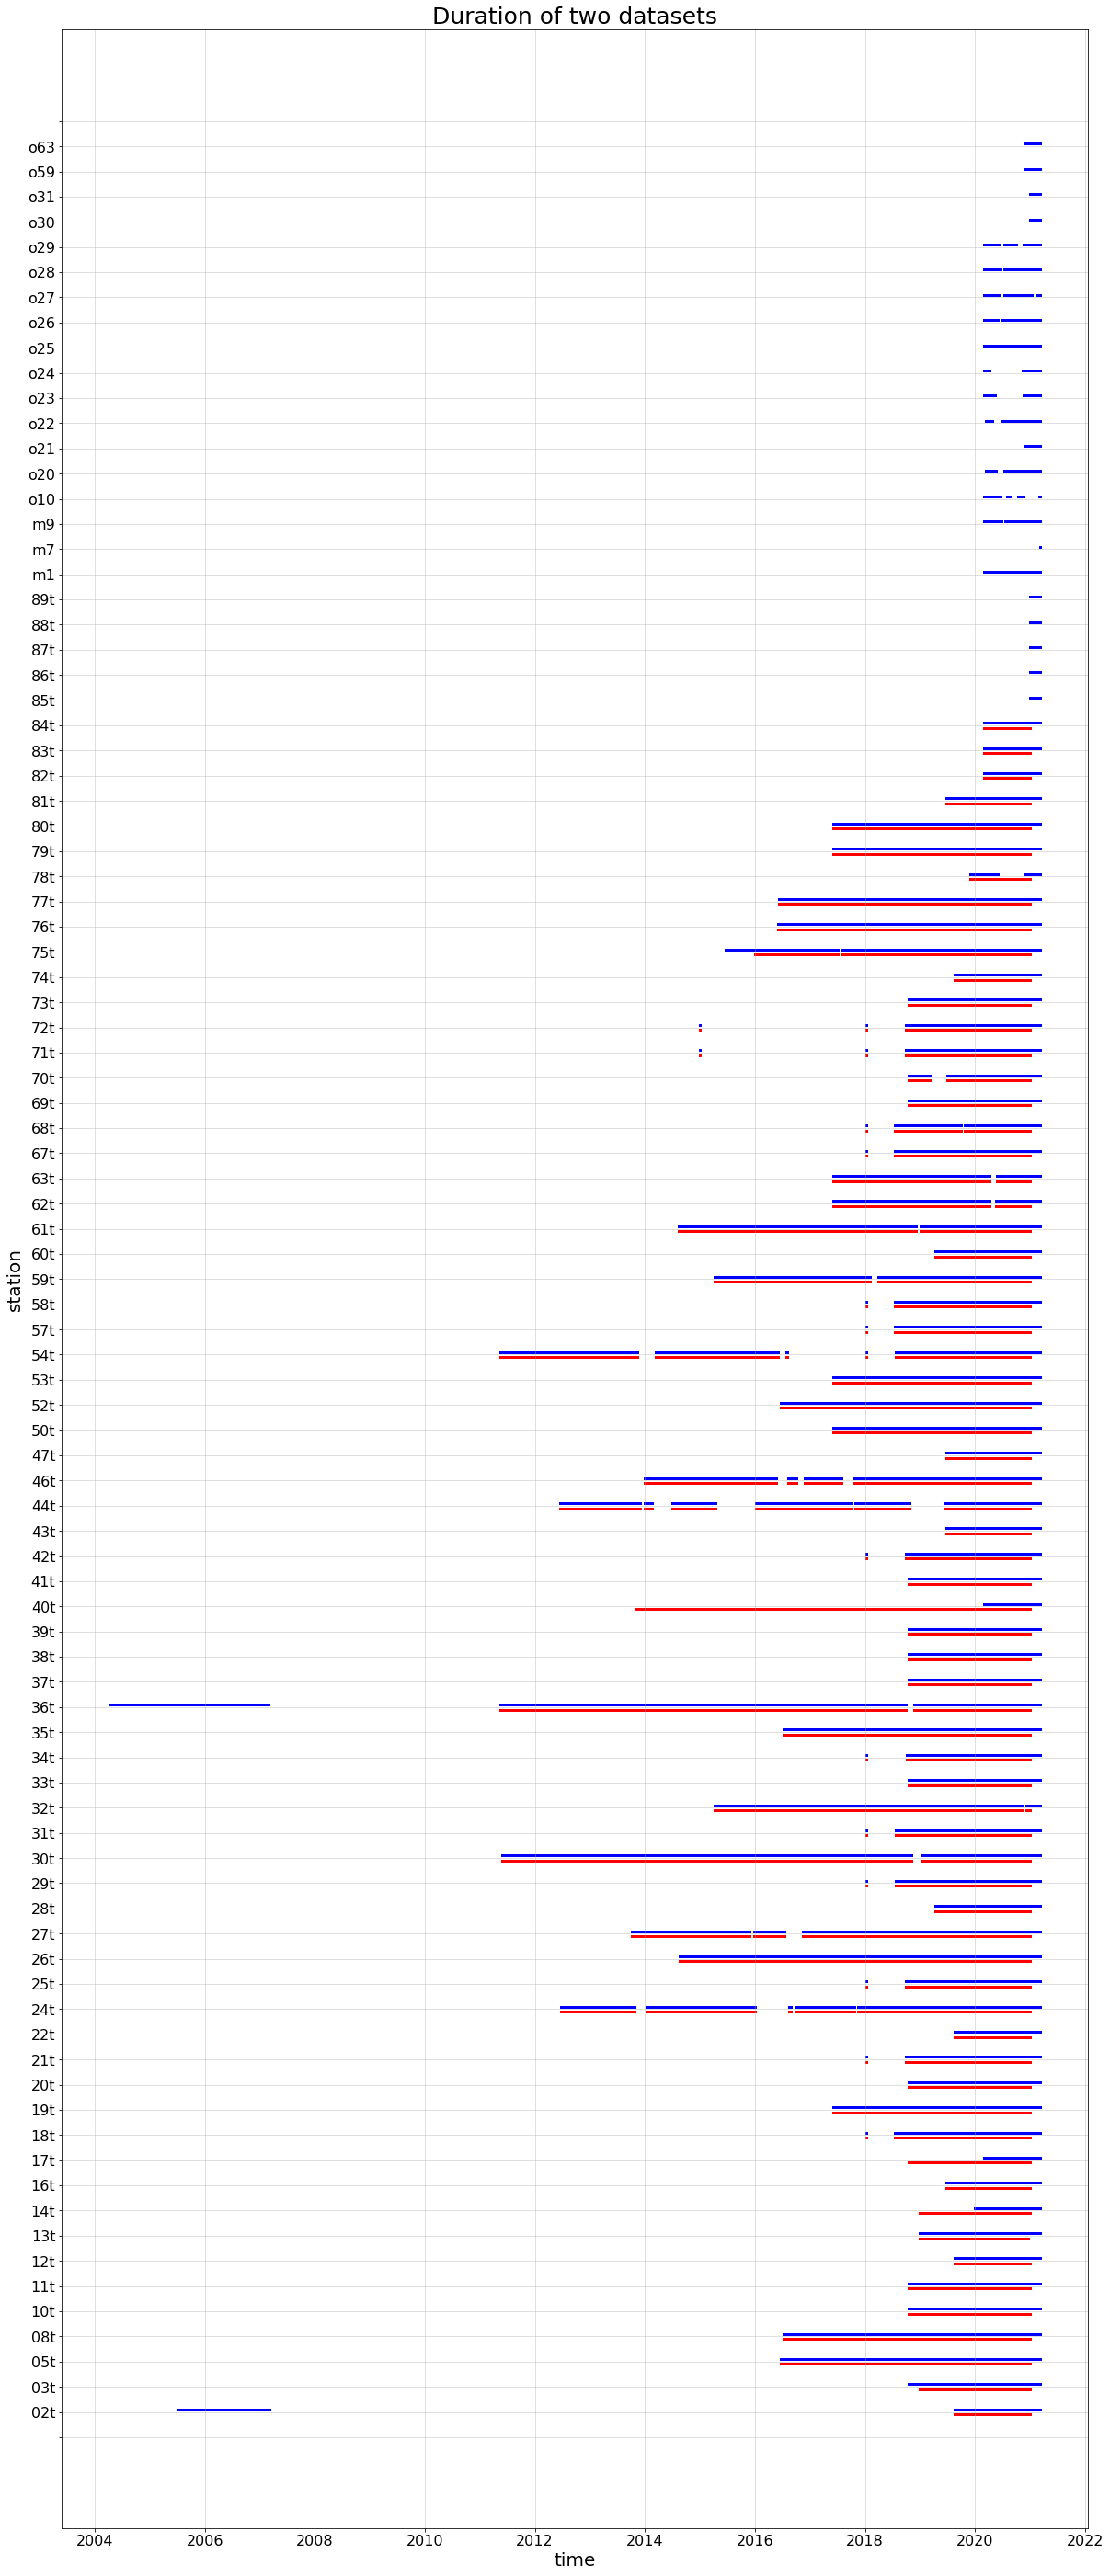

In [230]:
plt.figure(figsize=(20, 50))

for i,st in enumerate(station): 
    st_df=adpc_df[adpc_df['stationid']==st]
    st_df=st_df[st_df['PM25']!=np.nan]
    plt.scatter(st_df.index,st_df['PM25']/st_df['PM25']*i+0.9,marker = 's',s=5,c='r')
    
    st_df_f=fern_df[fern_df['stationid']==st]
    st_df_f=st_df_f[st_df_f['PM25']!=np.nan]
    plt.scatter(st_df_f.index,st_df_f['PM25']/st_df_f['PM25']*i+1.1,marker = 's',s=5,c='b')


plt.title('Duration of two datasets',fontsize=25)
plt.xlabel("time",fontsize=20)
plt.ylabel("station",fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.yticks(np.arange(0,len(label)), labels=label)
#plt.legend(loc='best',fontsize=15)
plt.grid(True, alpha=0.5)

plt.show()

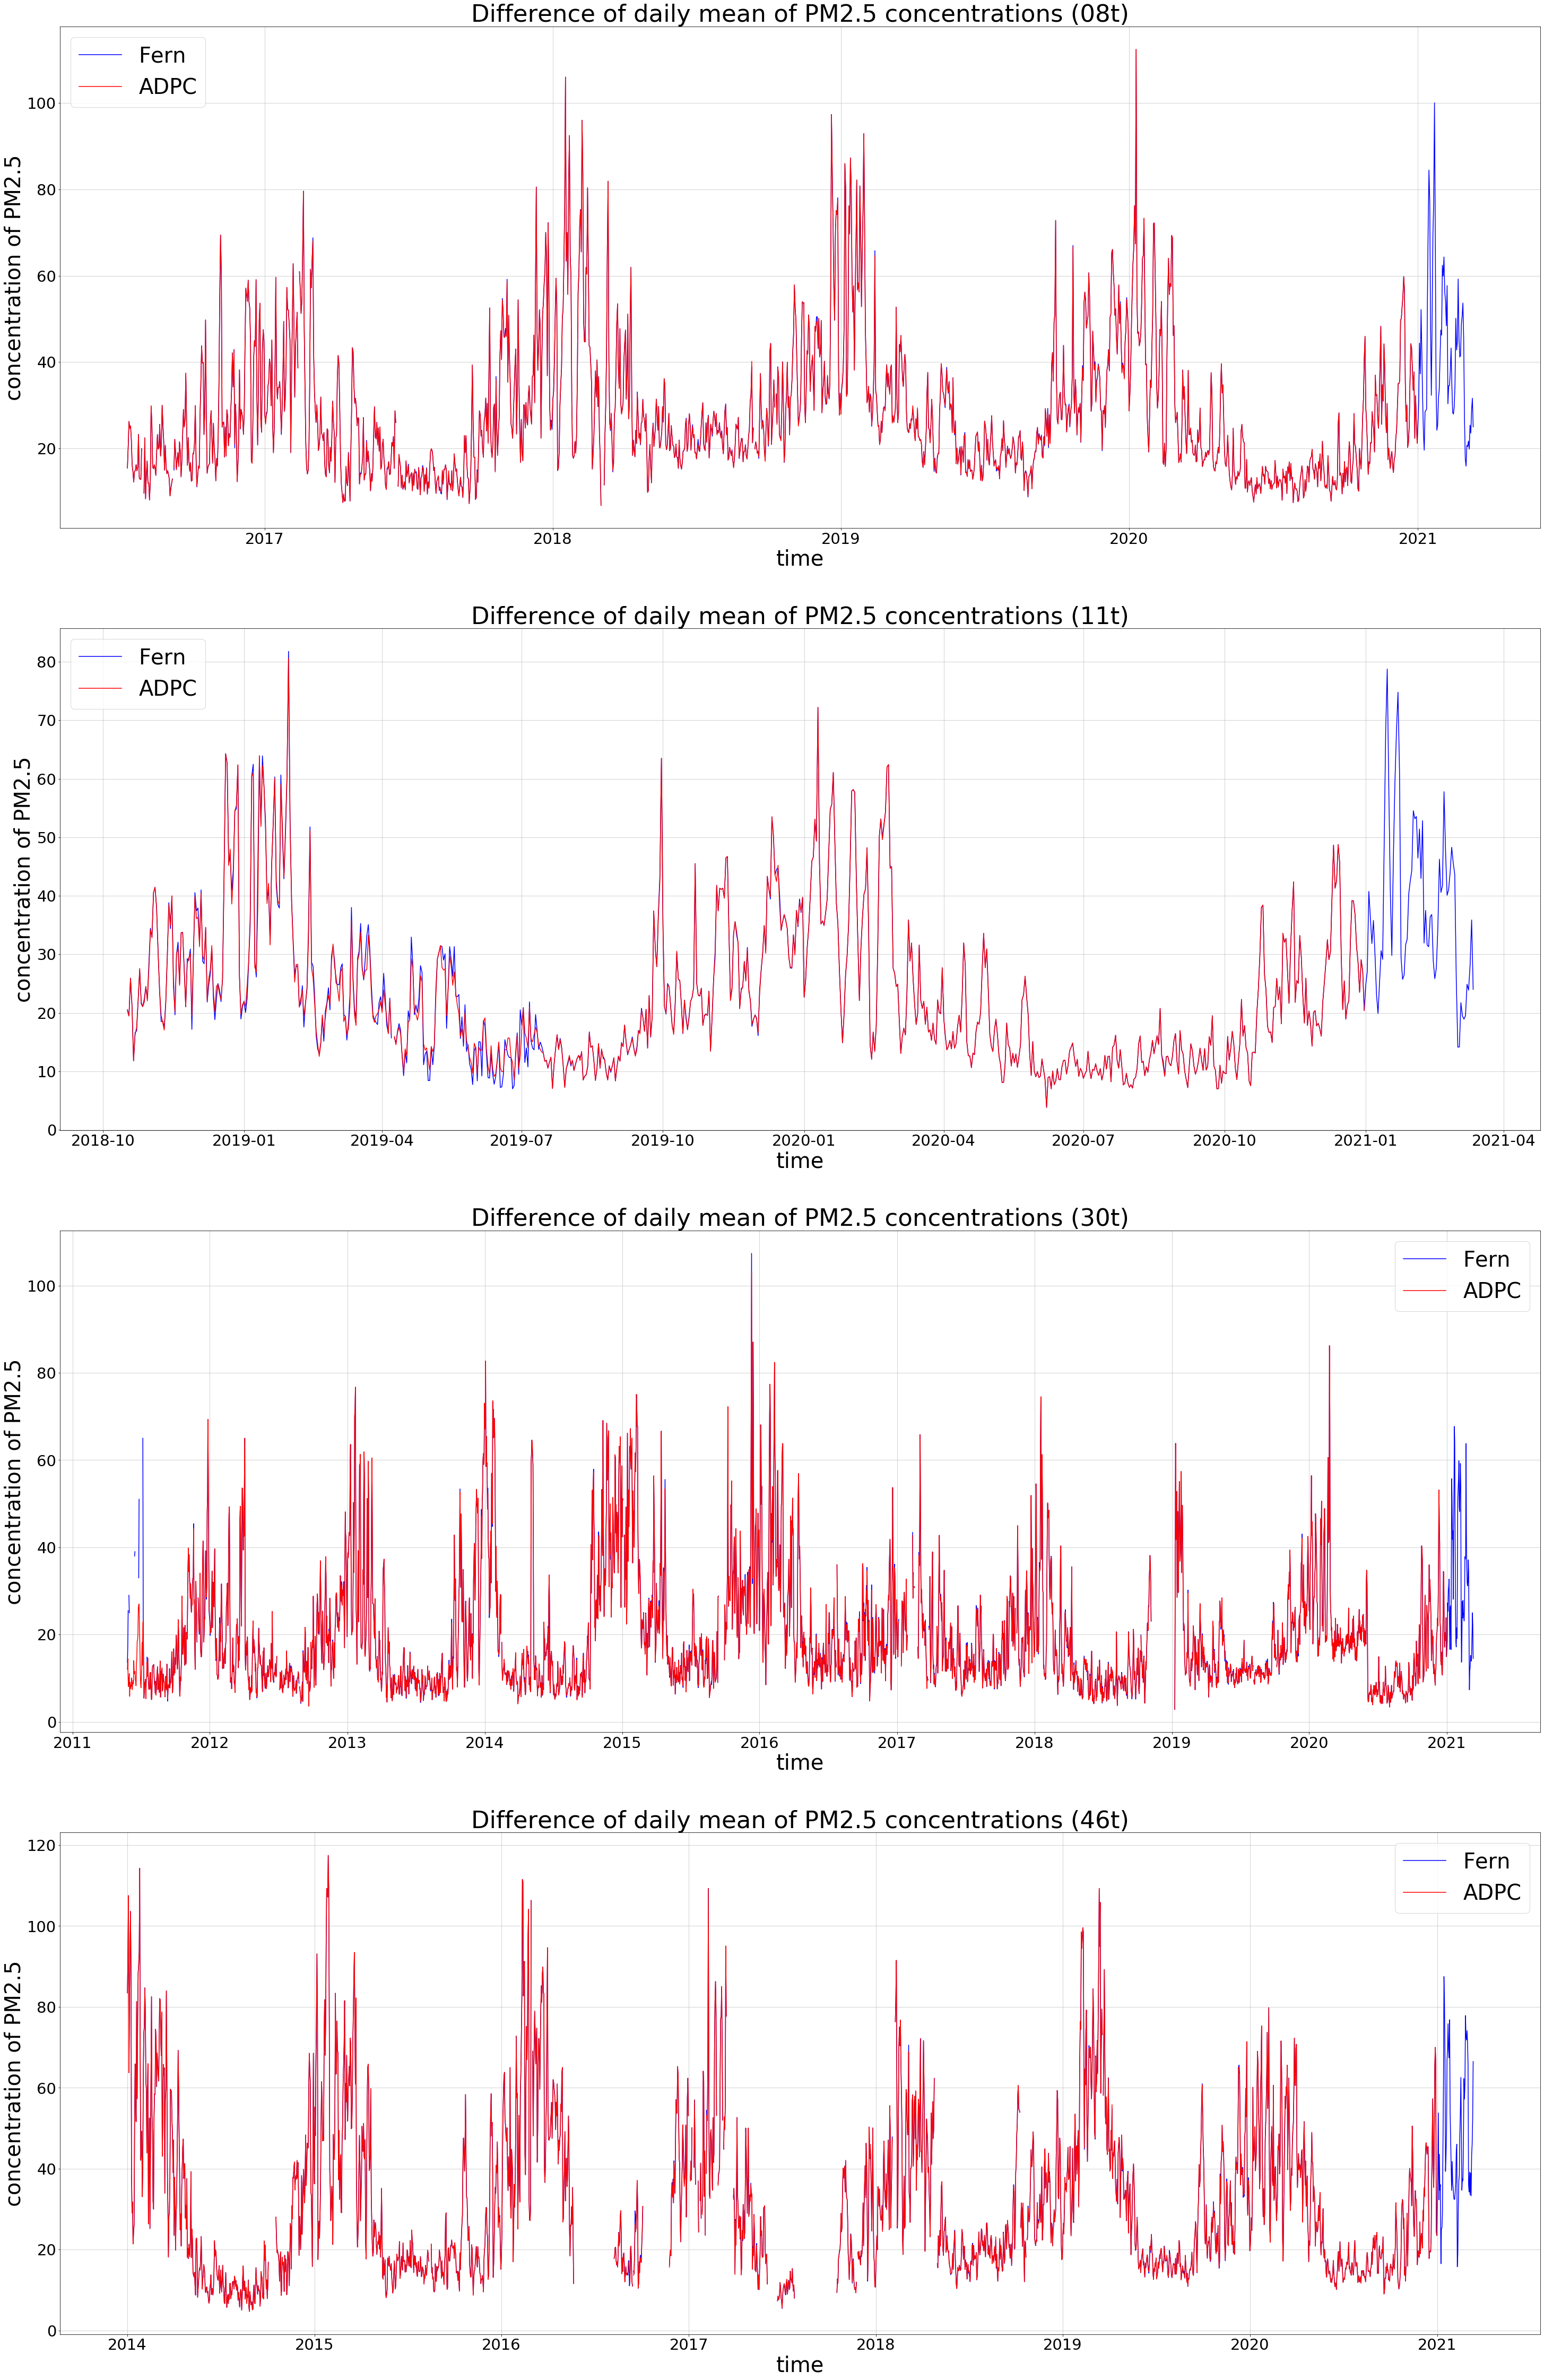

In [267]:
plt.figure(figsize=(50, 80))
pl=[]
i=0
target_st=['08t','11t','30t','46t']

for st in adpc_df['stationid'].unique(): 
    if st in target_st:
        df_st=pd.DataFrame()
        df_st_f=pd.DataFrame()
        
        st_df=adpc_df[adpc_df['stationid']==st]
        st_df_f=fern_df[fern_df['stationid']==st]
        
        df_st['mean']=st_df.PM25.resample('1D').mean()
        df_st_f['mean']=st_df_f.PM25.resample('1D').mean()

        df_st['sqrt']=np.sqrt(st_df.PM25.resample('1D').var())
        df_st_f['sqrt']=np.sqrt(st_df_f.PM25.resample('1D').var())
        
        pl.append(plt.subplot(len(target_st),1,i+1))
        
        pl[i].plot(df_st_f.index,df_st_f['mean'],color='b',linestyle='-',label='Fern')
        pl[i].plot(df_st.index,df_st['mean'],color='r',linestyle='-',label='ADPC')

        plt.title('Difference of daily mean of PM2.5 concentrations ('+st+')',fontsize=45)
        plt.xlabel("time",fontsize=40)
        plt.ylabel("concentration of PM2.5",fontsize=40)
        plt.xticks(fontsize=29)
        plt.yticks(fontsize=29)
        plt.legend(loc='best',fontsize=40)
        plt.grid(True, alpha=0.7)
        
        i=i+1
        
plt.show()

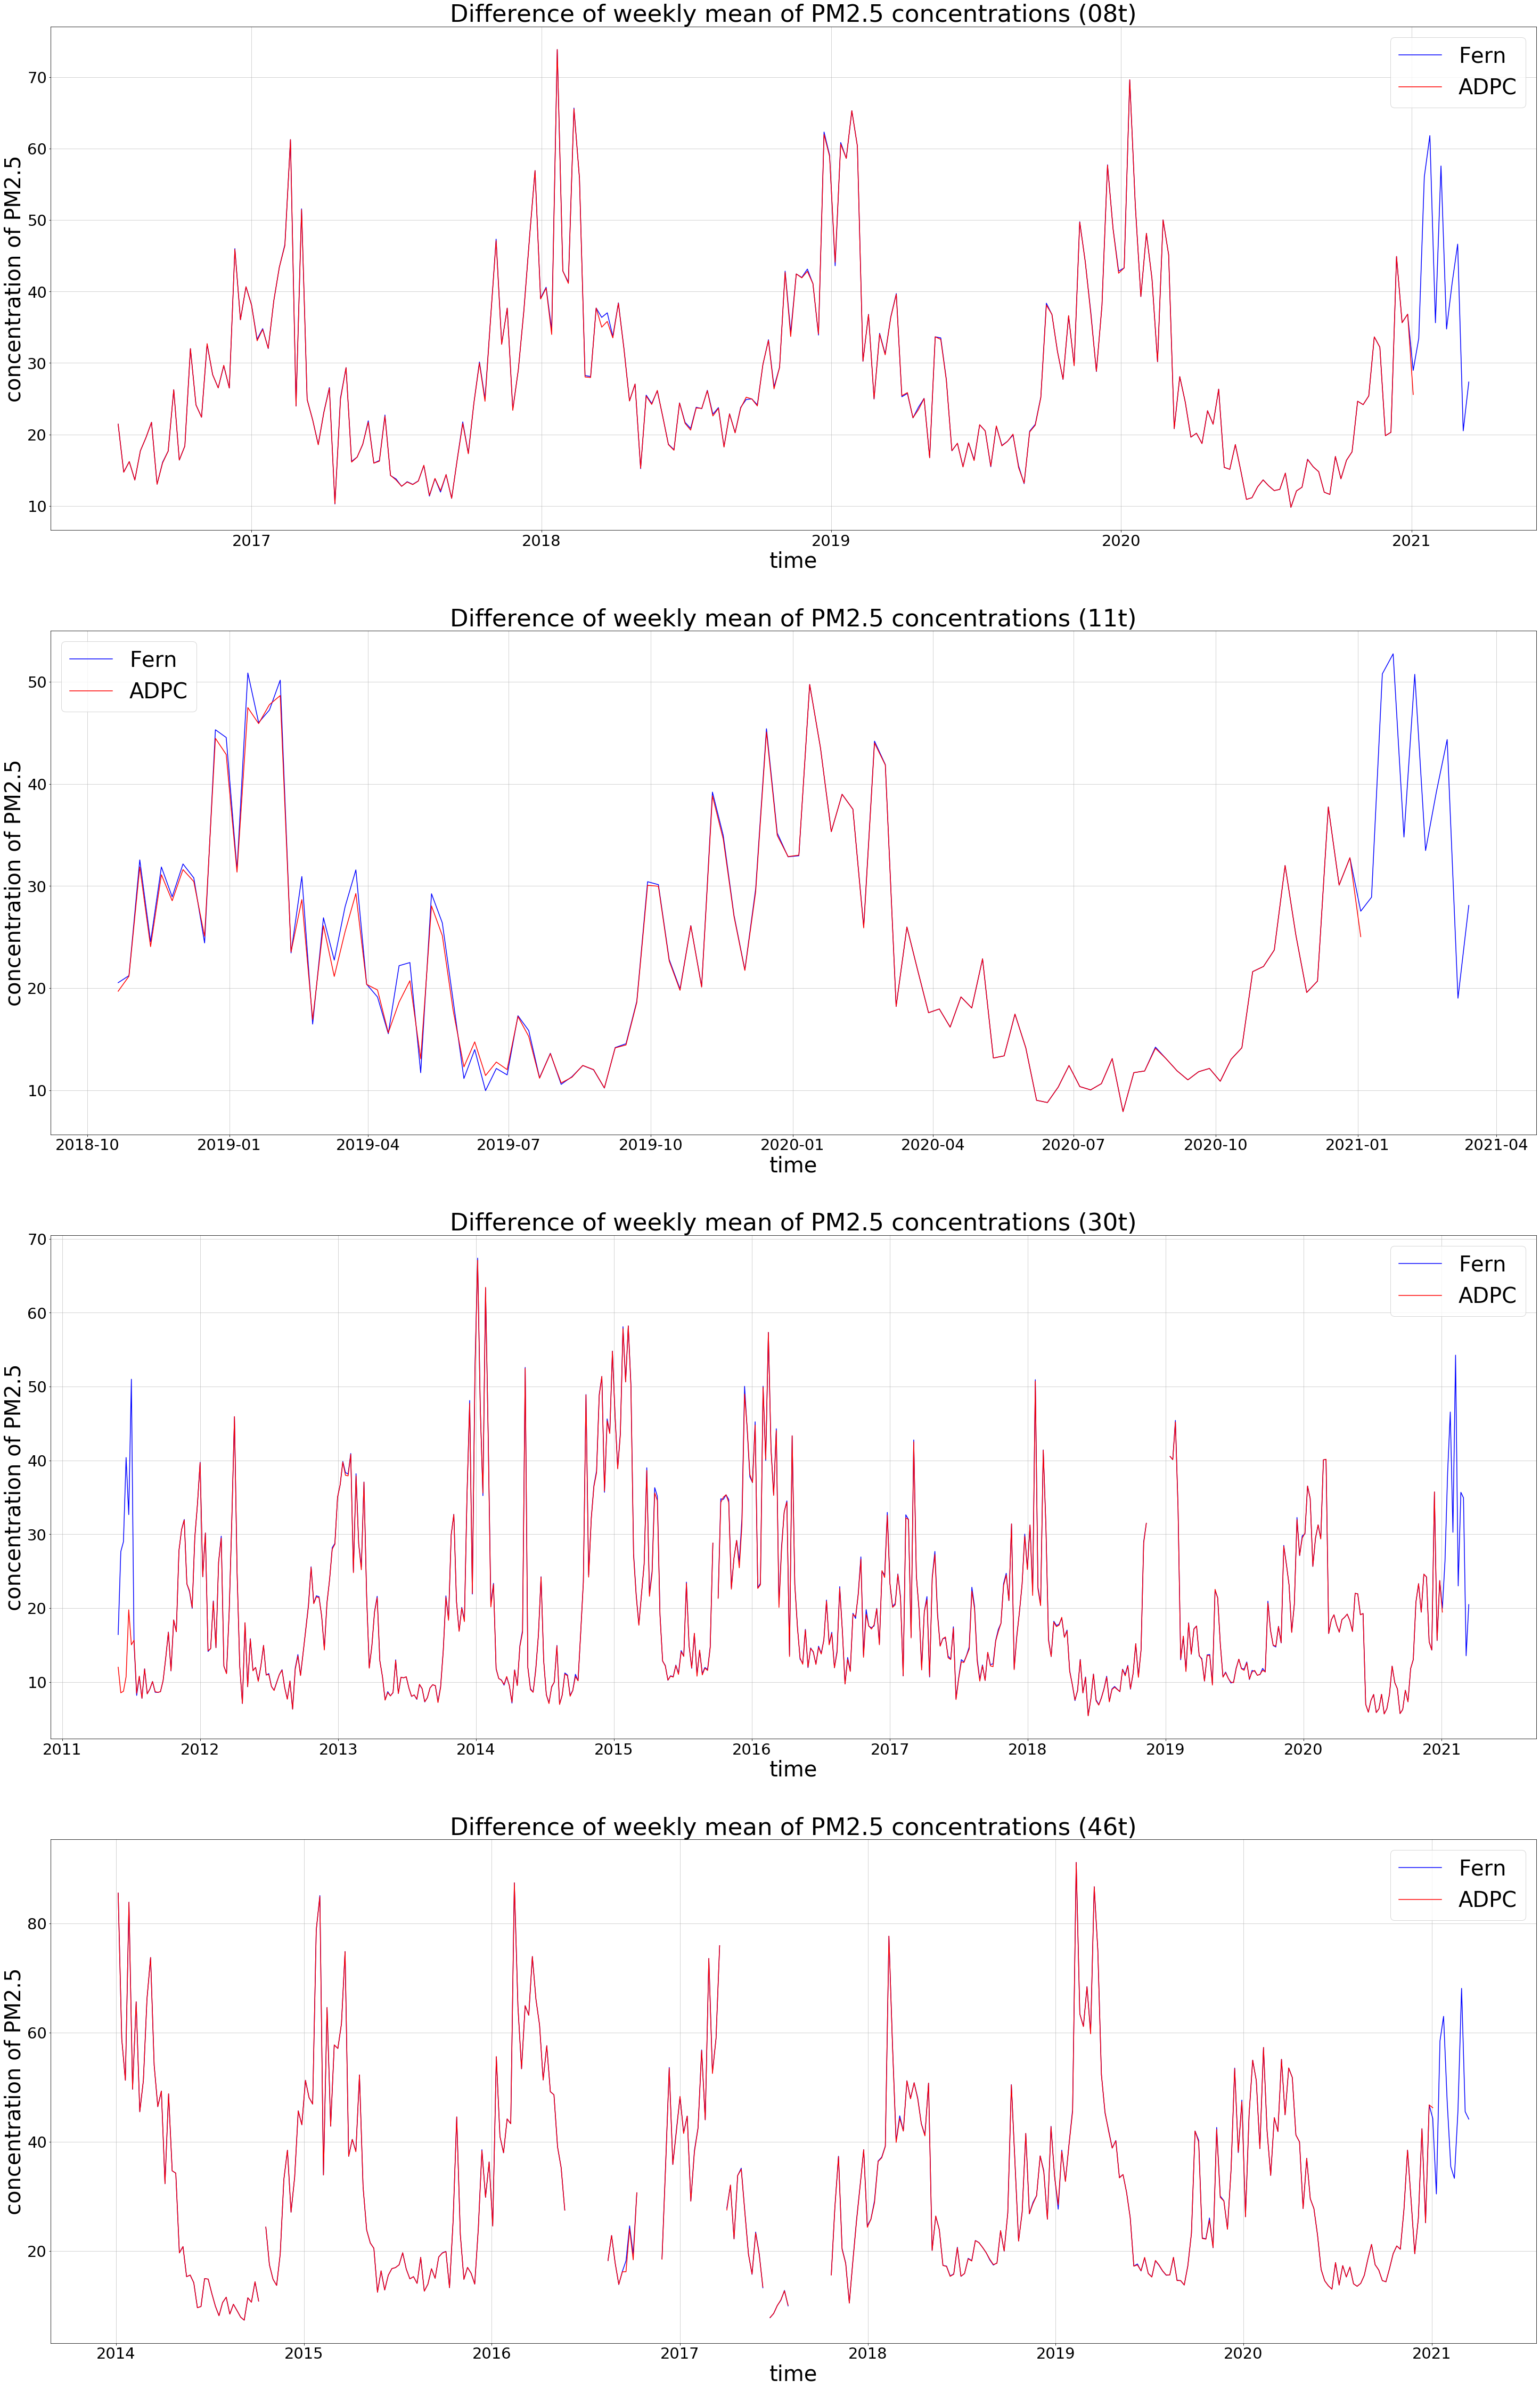

In [272]:
plt.figure(figsize=(50, 80))
pl=[]
i=0
target_st=['08t','11t','30t','46t']

for st in adpc_df['stationid'].unique(): 
    if st in target_st:
        df_st=pd.DataFrame()
        df_st_f=pd.DataFrame()
        
        st_df=adpc_df[adpc_df['stationid']==st]
        st_df_f=fern_df[fern_df['stationid']==st]
        
        df_st['mean']=st_df.PM25.resample('1W').mean()
        df_st_f['mean']=st_df_f.PM25.resample('1W').mean()

        df_st['sqrt']=np.sqrt(st_df.PM25.resample('1W').var())
        df_st_f['sqrt']=np.sqrt(st_df_f.PM25.resample('1W').var())
        
        pl.append(plt.subplot(len(target_st),1,i+1))
        
        pl[i].plot(df_st_f.index,df_st_f['mean'],color='b',linestyle='-',label='Fern')
        pl[i].plot(df_st.index,df_st['mean'],color='r',linestyle='-',label='ADPC')

        plt.title('Difference of weekly mean of PM2.5 concentrations ('+st+')',fontsize=45)
        plt.xlabel("time",fontsize=40)
        plt.ylabel("concentration of PM2.5",fontsize=40)
        plt.xticks(fontsize=29)
        plt.yticks(fontsize=29)
        plt.legend(loc='best',fontsize=40)
        plt.grid(True, alpha=0.7)
        
        i=i+1
        
plt.show()

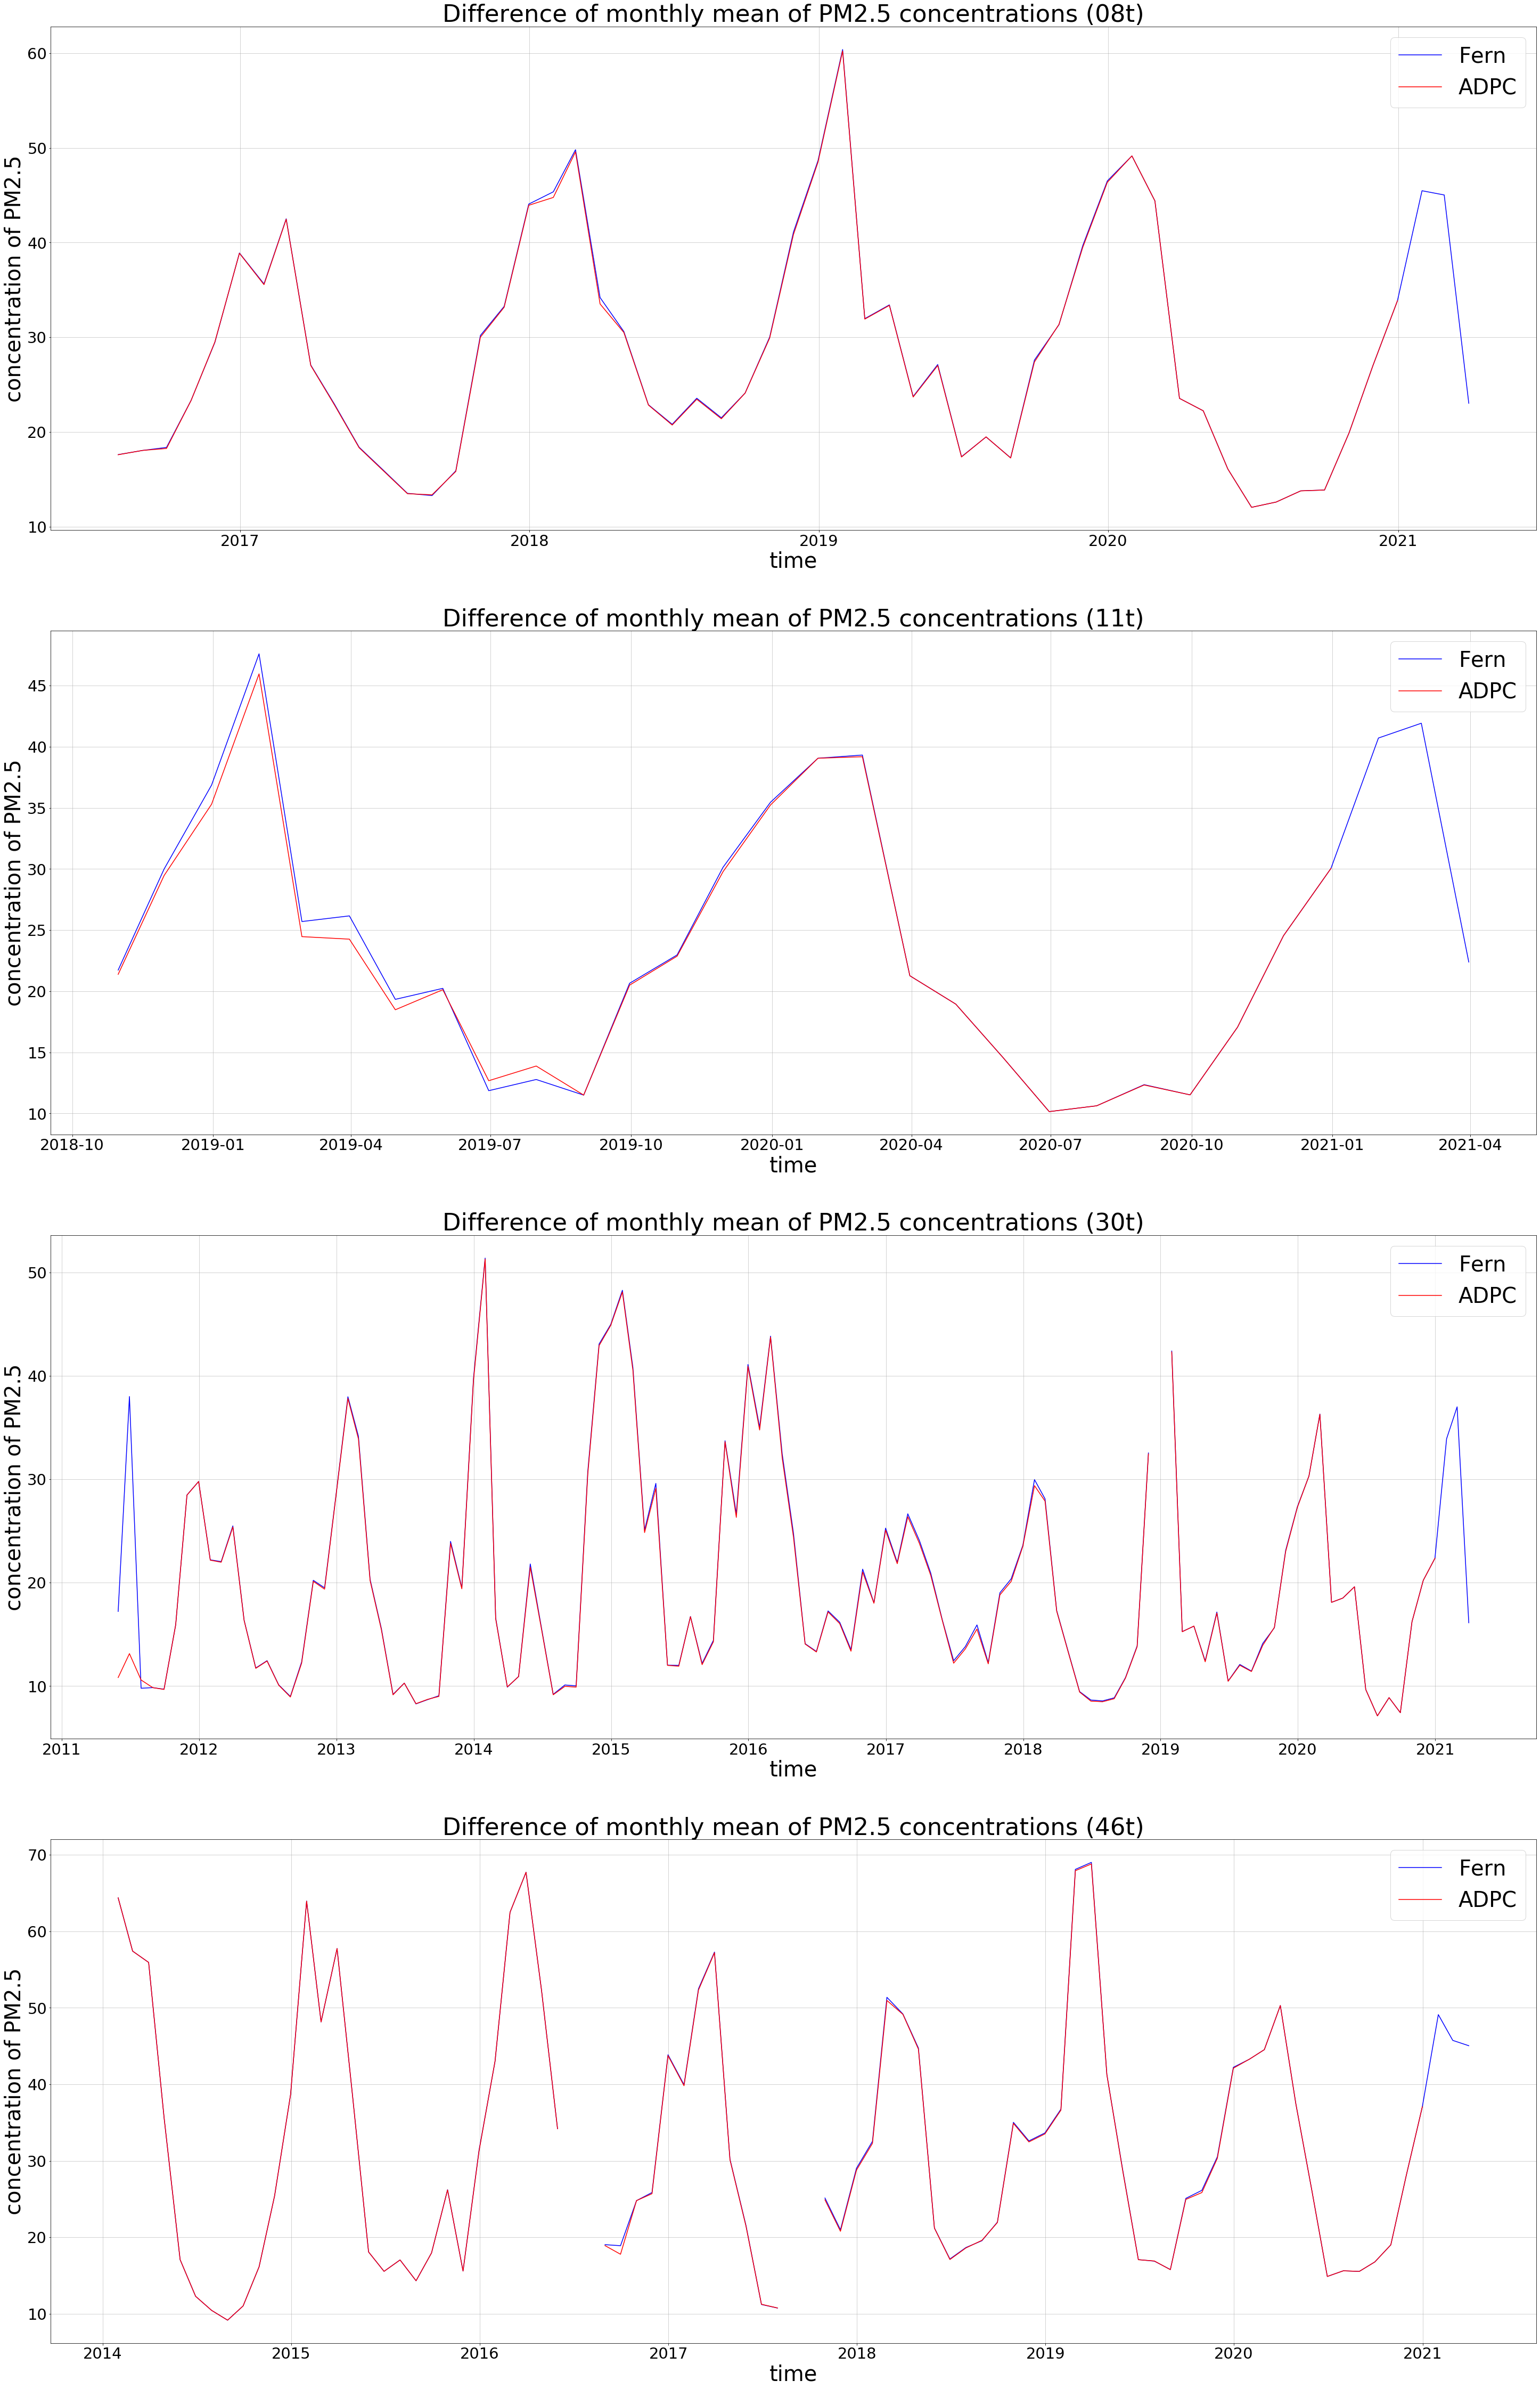

In [269]:
plt.figure(figsize=(50, 80))
pl=[]
i=0
target_st=['08t','11t','30t','46t']

for st in adpc_df['stationid'].unique(): 
    if st in target_st:
        df_st=pd.DataFrame()
        df_st_f=pd.DataFrame()
        
        st_df=adpc_df[adpc_df['stationid']==st]
        st_df_f=fern_df[fern_df['stationid']==st]
        
        df_st['mean']=st_df.PM25.resample('1M').mean()
        df_st_f['mean']=st_df_f.PM25.resample('1M').mean()

        df_st['sqrt']=np.sqrt(st_df.PM25.resample('1M').var())
        df_st_f['sqrt']=np.sqrt(st_df_f.PM25.resample('1M').var())
        
        pl.append(plt.subplot(len(target_st),1,i+1))
        
        pl[i].plot(df_st_f.index,df_st_f['mean'],color='b',linestyle='-',label='Fern')
        pl[i].plot(df_st.index,df_st['mean'],color='r',linestyle='-',label='ADPC')

        plt.title('Difference of monthly mean of PM2.5 concentrations ('+st+')',fontsize=45)
        plt.xlabel("time",fontsize=40)
        plt.ylabel("concentration of PM2.5",fontsize=40)
        plt.xticks(fontsize=29)
        plt.yticks(fontsize=29)
        plt.legend(loc='best',fontsize=40)
        plt.grid(True, alpha=0.7)
        
        i=i+1
        
plt.show()

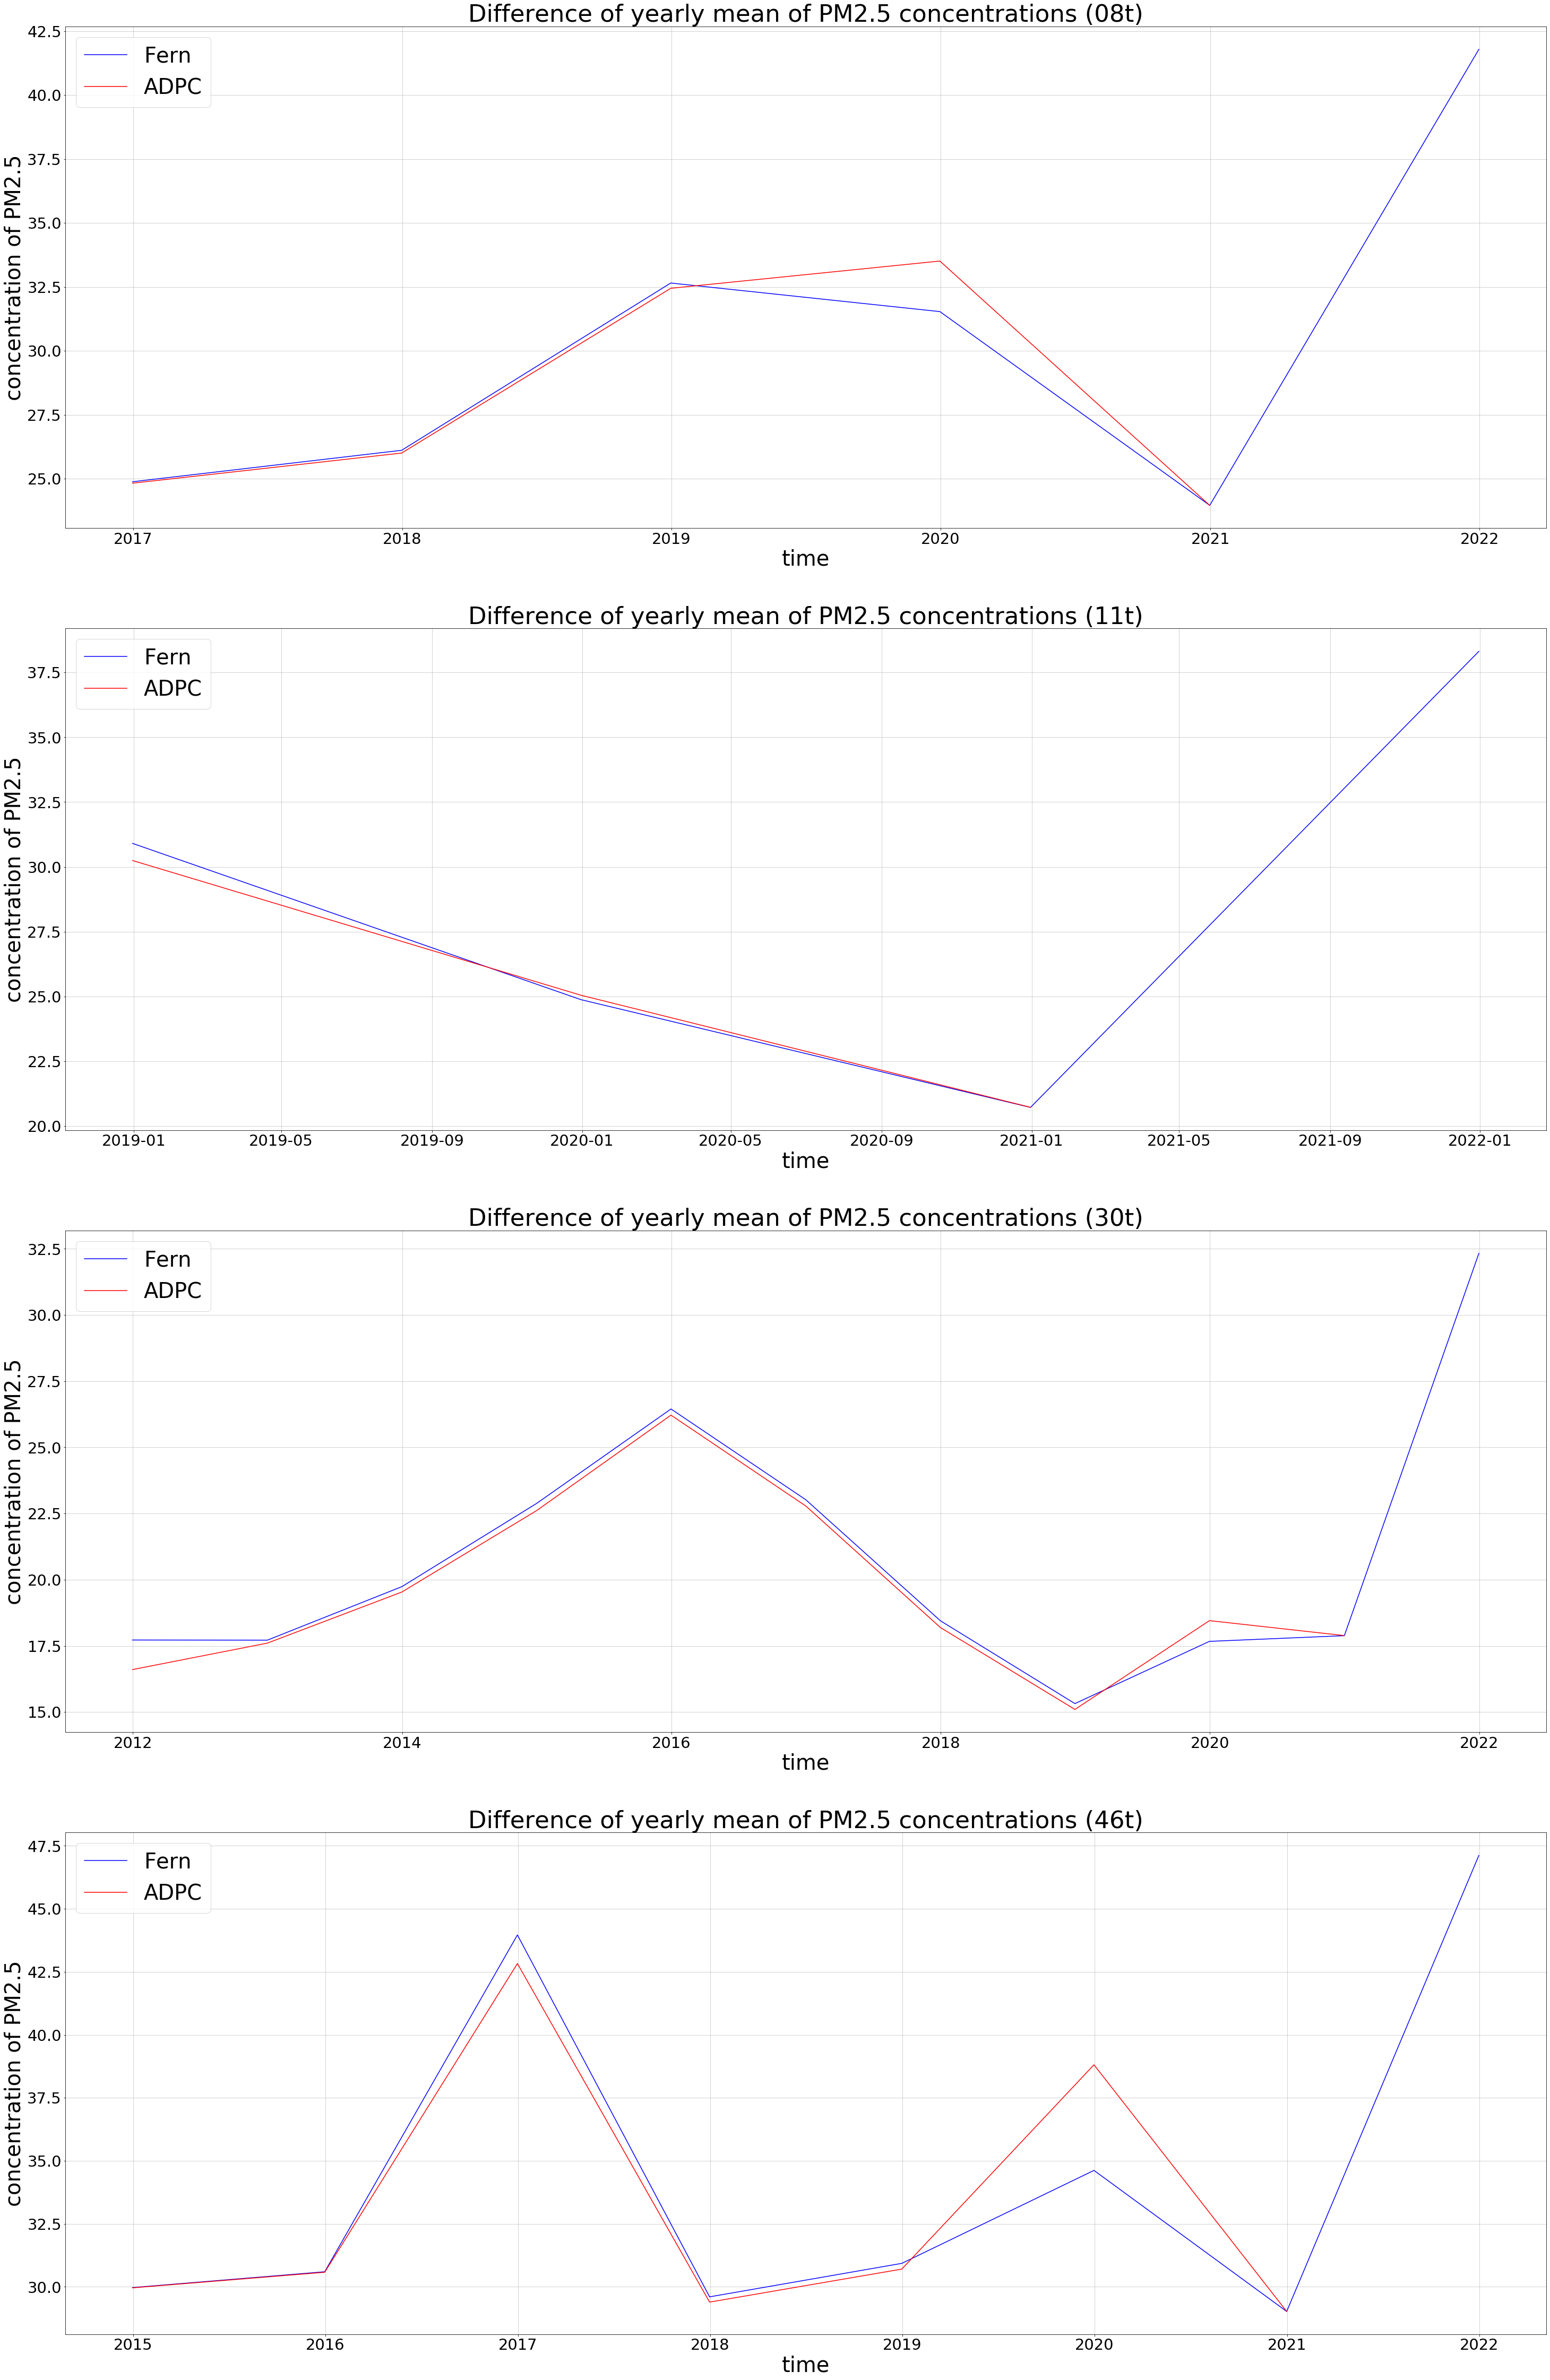

In [270]:
plt.figure(figsize=(50, 80))
pl=[]
i=0
target_st=['08t','11t','30t','46t']

for st in adpc_df['stationid'].unique(): 
    if st in target_st:
        df_st=pd.DataFrame()
        df_st_f=pd.DataFrame()
        
        st_df=adpc_df[adpc_df['stationid']==st]
        st_df_f=fern_df[fern_df['stationid']==st]
        
        df_st['mean']=st_df.PM25.resample('1Y').mean()
        df_st_f['mean']=st_df_f.PM25.resample('1Y').mean()

        df_st['sqrt']=np.sqrt(st_df.PM25.resample('1Y').var())
        df_st_f['sqrt']=np.sqrt(st_df_f.PM25.resample('1Y').var())
        
        pl.append(plt.subplot(len(target_st),1,i+1))
        
        pl[i].plot(df_st_f.index,df_st_f['mean'],color='b',linestyle='-',label='Fern')
        pl[i].plot(df_st.index,df_st['mean'],color='r',linestyle='-',label='ADPC')

        plt.title('Difference of yearly mean of PM2.5 concentrations ('+st+')',fontsize=45)
        plt.xlabel("time",fontsize=40)
        plt.ylabel("concentration of PM2.5",fontsize=40)
        plt.xticks(fontsize=29)
        plt.yticks(fontsize=29)
        plt.legend(loc='best',fontsize=40)
        plt.grid(True, alpha=0.7)
        
        i=i+1
        
plt.show()